In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")
import scipy

### Get datasets

In [2]:
sat = pd.read_csv('US_data.csv') #scores by stats
us_covid = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/01-01-2021.csv')
# covid
us_pop = pd.read_excel('usa_population.xlsx')

In [20]:
us_pop.head()

,states,population
0,Alabama,5024279
1,Alaska,733391
2,Arizona,7151502
3,Arkansas,3011524
4,California,39538223


In [3]:
sat_mean_var = pd.read_excel('sat_mean_var.xlsx') #mean scores

In [4]:
sat_mean_var.head()

,state,2018_tot_mu,2018_tot_var,2018_erw_mu,2018_erw_var,2018_math_mu,2018_math_var,2019_tot_mu,2019_tot_var,2019_erw_mu,2019_erw_var,2019_math_mu,2019_math_var,2020_tot_mu,2020_tot_var,2020_erw_mu,2020_erw_var,2020_math_mu,2020_math_var
0,Alabama,1166,205,595,100,571,116,1143,206,583,102,560,115,1127,194,576,97,551,109
1,Alaska,1106,173,562,90,544,96,1097,177,556,93,541,96,1098,173,555,92,543,93
2,Arizona,1149,174,577,88,572,97,1134,187,569,95,565,103,1139,179,571,92,568,98
3,Arkansas,1169,199,592,103,576,108,1141,208,582,107,559,112,1157,190,590,99,567,103
4,California,1076,205,540,101,536,114,1065,214,534,105,531,119,1049,217,527,107,522,119


In [5]:
states_arr = list(set(sat['state']))
us_covid = us_covid[us_covid['Province_State'].isin(states_arr)]

In [6]:
states_arr2 = us_covid['Province_State'].values
population = []
for state in states_arr2:
    pop_state = us_pop[us_pop['states']==state]['population'].values[0]
    population.append(pop_state)

In [7]:
covid_confirmed = us_covid['Confirmed'].values
population = np.array(population)
covid_by_pop = covid_confirmed/population
covid_by_pop.max()

0.11837595976865437

In [27]:
#North Dakota
sat.head()

,Unnamed: 0,Unnamed: 0.1,state,year,tot_mean,subject_mean,total_counts,total_perc,total_erw,total_erw_perc,...,female_erw,female_erw_perc,female_math,female_math_perc,male_counts,male_perc,male_erw,male_erw_perc,male_math,male_math_perc
0,0,0.0,Maryland,2018,1495,750,3843,8,3953,8,...,2025,8,2025,8,2045,9,2045,9,2954,13
1,1,1.0,Maryland,2018,1295,645,10393,22,12076,25,...,6327,25,4303,17,5226,23,5680,25,4544,20
2,2,2.0,Maryland,2018,1095,545,16234,34,15671,33,...,8605,34,8858,35,7271,32,7271,32,7271,32
3,3,3.0,Maryland,2018,895,445,13311,28,12723,26,...,6833,27,7087,28,5907,26,5907,26,5453,24
4,4,4.0,Maryland,2018,695,345,4217,9,3555,7,...,1519,6,3037,12,2045,9,1818,8,2272,10


In [45]:
wisc = sat[sat['state']=='Wisconsin']
wisc18 = wisc[wisc['year']==2018]
wisc19 = wisc[wisc['year']==2019]
wisc20 = wisc[wisc['year']==2020]
# north_dakota19

In [46]:
wisc18

,Unnamed: 0,Unnamed: 0.1,state,year,tot_mean,subject_mean,total_counts,total_perc,total_erw,total_erw_perc,...,female_erw,female_erw_perc,female_math,female_math_perc,male_counts,male_perc,male_erw,male_erw_perc,male_math,male_math_perc
342,342,342.0,Wisconsin,2018,1495,750,661,34,634,33,...,313,32,322,33,369,39,322,34,445,47
343,343,343.0,Wisconsin,2018,1295,645,691,36,720,37,...,371,38,293,30,341,36,341,36,284,30
344,344,344.0,Wisconsin,2018,1095,545,454,24,417,22,...,215,22,283,29,180,19,199,21,170,18
345,345,345.0,Wisconsin,2018,895,445,107,6,135,7,...,68,7,68,7,47,5,66,7,47,5
346,346,346.0,Wisconsin,2018,695,345,10,1,17,1,...,10,1,10,1,0,0,9,1,9,1
347,347,347.0,Wisconsin,2018,495,245,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# import seaborn as sns
# sns.histplot(data=wisc18, x="tot_mean", y='tot_counts')

### Functions

In [8]:
def get_scoreArr(df_arr, count_type):
    all_years = []
    for j in range(len(df_arr)):
        res = []
        scores = df_arr[j]['tot_mean'].tolist()
        counts = df_arr[j][count_type].tolist()

        for i in range(len(scores)):
            res += [scores[i]]*counts[i]
        all_years.append(res)
    return all_years

In [9]:
def get_KS(states):
    ks_arr = [[], []]  
    female_ks = [[], []]
    male_ks = [[], []]
    erw_ks = [[], []]
    math_ks = [[], []]
    erw_ks_fem = [[], []]
    math_ks_fem = [[], []]
    erw_ks_male = [[], []]
    math_ks_male = [[], []]
    
    for state in states_arr:
        for i in range(2):
            state_df = sat[sat['state']==state]
            state19 = state_df[state_df['year']==2018+i]
            state20 = state_df[state_df['year']==2018+i+1]

            total_scores = get_scoreArr([state19, state20], 'total_counts')
            ks_arr[i].append(stats.ks_2samp(total_scores[0], total_scores[1])[0])
            fem_scores = get_scoreArr([state19, state20], 'female_counts')
            female_ks[i].append(stats.ks_2samp(fem_scores[0], fem_scores[1])[0])
            male_scores = get_scoreArr([state19, state20], 'male_counts')
            male_ks[i].append(stats.ks_2samp(male_scores[0], male_scores[1])[0])
            
            erw_scores = get_scoreArr([state19, state20], 'total_erw')
            erw_ks[i].append(stats.ks_2samp(erw_scores[0], erw_scores[1])[0])
            math_scores = get_scoreArr([state19, state20], 'total_math')
            math_ks[i].append(stats.ks_2samp(math_scores[0], math_scores[1])[0])
            
            erw_fem = get_scoreArr([state19, state20], 'female_erw')
            erw_ks_fem[i].append(stats.ks_2samp(erw_fem[0], erw_fem[1])[0])
            math_fem = get_scoreArr([state19, state20], 'female_math')
            math_ks_fem[i].append(stats.ks_2samp(math_fem[0], math_fem[1])[0])
            
            erw_male = get_scoreArr([state19, state20], 'male_erw')
            erw_ks_male[i].append(stats.ks_2samp(erw_male[0], erw_male[1])[0])
            math_male = get_scoreArr([state19, state20], 'male_math')
            math_ks_male[i].append(stats.ks_2samp(math_male[0], math_male[1])[0])
        
    return ks_arr, female_ks, male_ks, erw_ks, math_ks, erw_ks_fem, math_ks_fem, erw_ks_male, math_ks_male

In [10]:
def contig_table(states):
    res = [[],[]]
    chi_stats = [[],[]]
    chi_square = 3.84
    delta_top = [[],[]]
    
    for state in states_arr:
        for i in range(2):
        #get state
            state_df = sat[sat['state']==state]
            state19 = state_df[state_df['year']==2018+i]
            state20 = state_df[state_df['year']==2018+i+1]
#             print(state19)

            #get the table elements
            best19 = state19[state19['tot_mean']==1495]['total_counts'].values[0]
            notbest19 = state19[state19['tot_mean']!=1495]['total_counts'].sum()
            best20 = state20[state20['tot_mean']==1495]['total_counts'].values[0]
            notbest20 = state20[state20['tot_mean']!=1495]['total_counts'].sum()

            #get row and column total
            best_total = best19+best20
            notbest_total = notbest19+notbest20
            total19 = best19+notbest19
            total20 = best20+notbest20
            n = best_total+notbest_total
            
            #save proportions
            delta_top[i].append(best20/total20-best19/total19)
            
            ###CONTIG TABLE
            #get the expected values
            mu_best19 = best_total*total19/n
            mu_best20 = best_total*total20/n
            mu_notbest19 = notbest_total*total19/n
            mu_notbest20 = notbest_total*total20/n

            chi_stat = (best19-mu_best19)**2/mu_best19 + (best20-mu_best20)**2/mu_best20 + \
                        +(notbest19-mu_notbest19)**2/mu_notbest19 +  (notbest20-mu_notbest20)**2/mu_notbest20
            chi_stats[i].append(chi_stat)
            if chi_stat <= chi_square:
                res[i].append('same')
            else:
                res[i].append('not same')
    return res, chi_stats, delta_top

In [11]:
k, f, m, e, mat, efem, matfem, emale, matmale = get_KS(states_arr)
ks_data = {'states': states_arr, 'totalKS_1819': k[0], 'totalKS_1920': k[1], 
          'femaleKS_1819': f[0], 'femaleKS_1920': f[1], 'maleKS_1819': m[0], 'maleKS_1920': m[1],
          'erwKS_1819': e[0], 'erwKS_1920': e[1], 'mathKS_1819': mat[0],  'mathKS_1920': mat[1],
          'erwKSfem_1819':efem[0], 'erwKSfem_1920': efem[1], 'mathKSfem_1819':matfem[0], 'mathKSfem_1920':matfem[1],
          'erwKSmale_1819':emale[0], 'erwKSmale_1920': emale[1], 'mathKSmale_1819':matmale[0], 'mathKSmale_1920':matmale[1]}
ks_df = pd.DataFrame.from_dict(ks_data)
ks_df = ks_df.sort_values(by='states')

#### Plot graphs of Delta of (difference between KS statistics) VS Covid Intensity

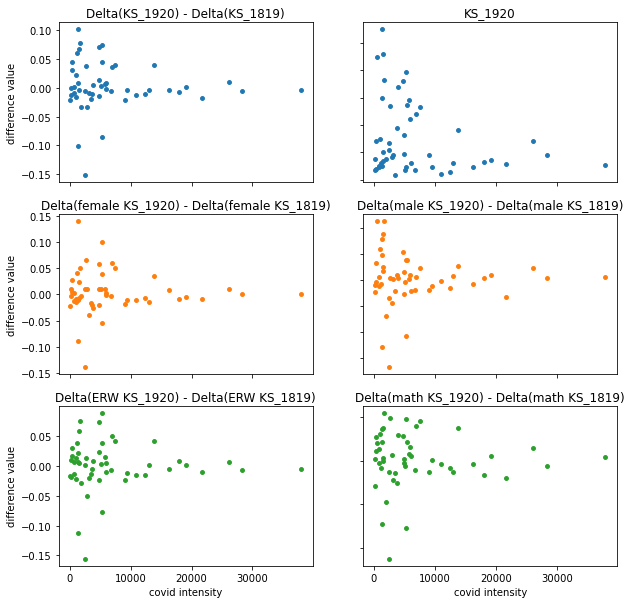

In [23]:
#delta_KS to covid intensity
fig, axs = plt.subplots(3, 2,figsize=(10,10))
cov_deaths = us_covid['Confirmed'].values
axs[0,0].scatter(cov_deaths, ks_df['totalKS_1920'].values - ks_df['totalKS_1819'].values, s=15)
axs[0,0].set_title('Delta(KS_1920) - Delta(KS_1819)')
axs[0,1].scatter(cov_deaths, ks_df['totalKS_1920'].values,s=15)
axs[0,1].set_title('KS_1920')
axs[1,0].scatter(cov_deaths, ks_df['femaleKS_1920'].values - ks_df['femaleKS_1819'].values, s=15,color='tab:orange')
axs[1,0].set_title('Delta(female KS_1920) - Delta(female KS_1819)')
axs[1,1].scatter(cov_deaths, ks_df['maleKS_1920'].values - ks_df['maleKS_1819'].values, s=15,color='tab:orange')
axs[1,1].set_title('Delta(male KS_1920) - Delta(male KS_1819)')
axs[2,0].scatter(cov_deaths, ks_df['erwKS_1920'].values - ks_df['erwKS_1819'].values, s=15,color='tab:green')
axs[2,0].set_title('Delta(ERW KS_1920) - Delta(ERW KS_1819)')
axs[2,1].scatter(cov_deaths, ks_df['mathKS_1920'].values - ks_df['mathKS_1819'].values, s=15,color='tab:green')
axs[2,1].set_title('Delta(math KS_1920) - Delta(math KS_1819)');

for ax in axs.flat:
    ax.set(xlabel='covid intensity', ylabel='difference value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()ф
# plt.xlabel('Covid Intensity')
# plt.ylabel('Delta KS');

#### KS plots with COVID confirmed cases

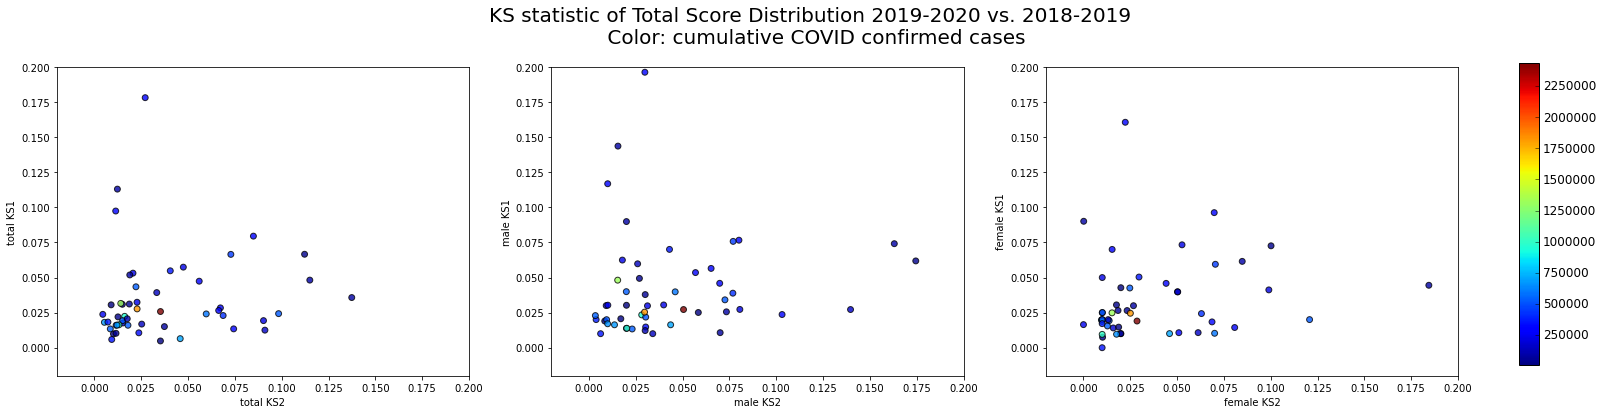

In [12]:
fig, axs = plt.subplots(1,3,figsize=(28,6))
plt.style.use('classic')
y = ks_df['totalKS_1819'].values
x = ks_df['totalKS_1920'].values
cov_deaths = us_covid['Confirmed'].values
colormap = plt.cm.jet
colour = cov_deaths
axs[0].scatter(ks_df['totalKS_1920'].values, ks_df['totalKS_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[0].set_xlabel('total KS2')
axs[0].set_ylabel('total KS1')
axs[1].scatter(ks_df['maleKS_1920'].values, ks_df['maleKS_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[1].set_xlabel('male KS2')
axs[1].set_ylabel('male KS1')
axs[2].scatter(ks_df['femaleKS_1920'].values, ks_df['femaleKS_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[2].set_xlabel('female KS2')
axs[2].set_ylabel('female KS1')
for ax in axs:
    ax.set_ylim(-0.02, 0.2)
    ax.set_xlim(-0.02, 0.2)
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=7000, vmax=2440000)
fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(sm, cax=cbar_ax)
plt.suptitle('KS statistic of Total Score Distribution 2019-2020 vs. 2018-2019 \n Color: cumulative COVID confirmed cases',fontsize=20)
fig.subplots_adjust(top=0.84)
plt.show()

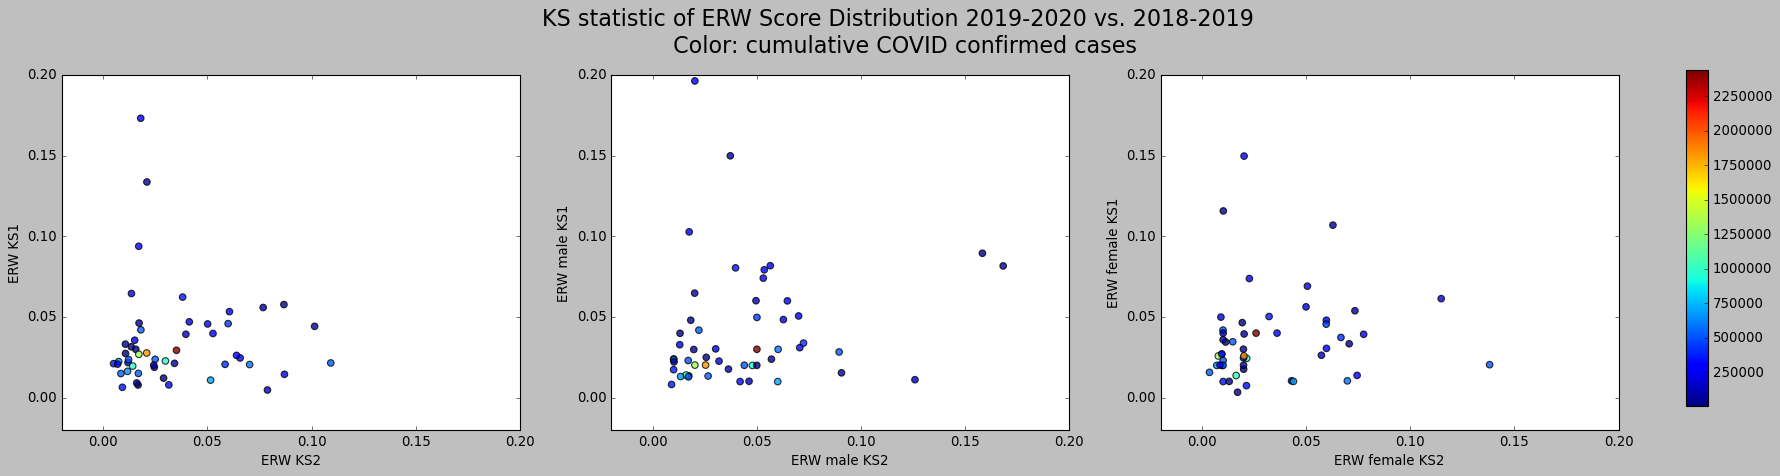

In [118]:
fig, axs = plt.subplots(1,3,figsize=(28,6))
plt.style.use('classic')
colormap = plt.cm.jet
colour = cov_deaths
axs[0].scatter(ks_df['erwKS_1920'].values, ks_df['erwKS_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[0].set_xlabel('ERW KS2')
axs[0].set_ylabel('ERW KS1')
axs[1].scatter(ks_df['erwKSmale_1920'].values, ks_df['erwKSmale_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[1].set_xlabel('ERW male KS2')
axs[1].set_ylabel('ERW male KS1')
axs[2].scatter(ks_df['erwKSfem_1920'].values, ks_df['erwKSfem_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[2].set_xlabel('ERW female KS2')
axs[2].set_ylabel('ERW female KS1')
for ax in axs:
    ax.set_ylim(-0.02, 0.2)
    ax.set_xlim(-0.02, 0.2)
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=7000, vmax=2440000)
fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(sm, cax=cbar_ax)
plt.suptitle('KS statistic of ERW Score Distribution 2019-2020 vs. 2018-2019 \n Color: cumulative COVID confirmed cases',fontsize=20)
fig.subplots_adjust(top=0.84)
plt.show()

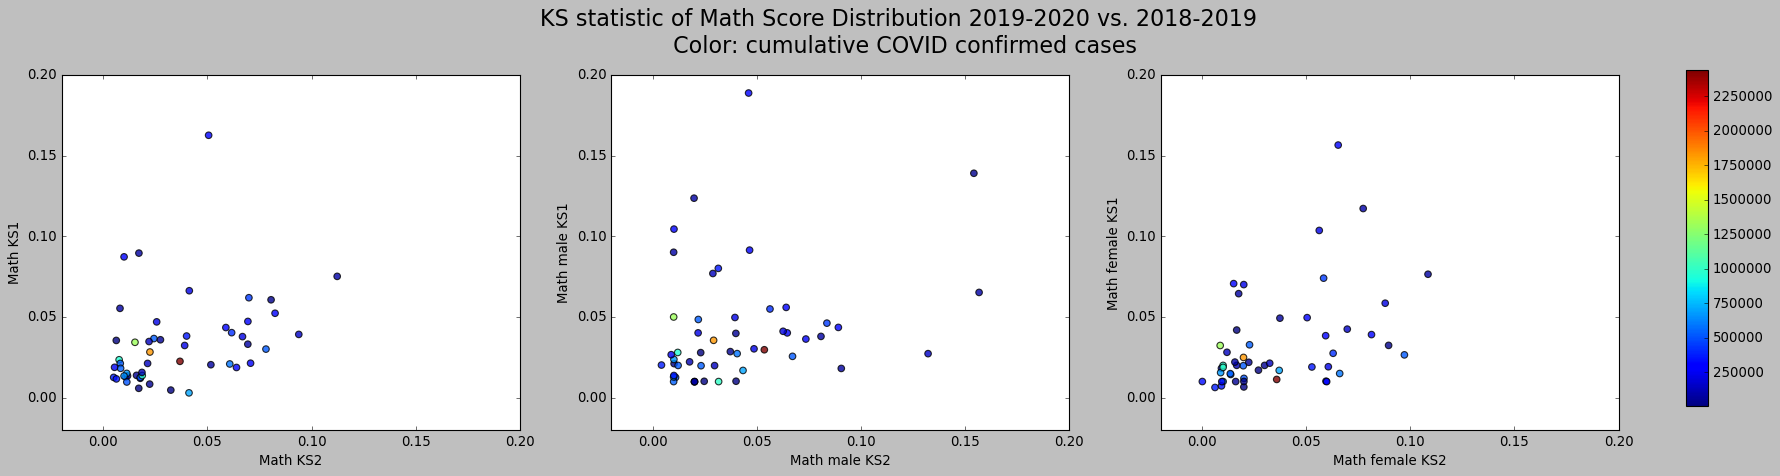

In [119]:
fig, axs = plt.subplots(1,3,figsize=(28,6))
plt.style.use('classic')
colormap = plt.cm.jet
colour = cov_deaths
axs[0].scatter(ks_df['mathKS_1920'].values, ks_df['mathKS_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[0].set_xlabel('Math KS2')
axs[0].set_ylabel('Math KS1')
axs[1].scatter(ks_df['mathKSmale_1920'].values, ks_df['mathKSmale_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[1].set_xlabel('Math male KS2')
axs[1].set_ylabel('Math male KS1')
axs[2].scatter(ks_df['mathKSfem_1920'].values, ks_df['mathKSfem_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[2].set_xlabel('Math female KS2')
axs[2].set_ylabel('Math female KS1')
for ax in axs:
    ax.set_ylim(-0.02, 0.2)
    ax.set_xlim(-0.02, 0.2)
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=7000, vmax=2440000)
fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(sm, cax=cbar_ax)
plt.suptitle('KS statistic of Math Score Distribution 2019-2020 vs. 2018-2019 \n Color: cumulative COVID confirmed cases',fontsize=20)
fig.subplots_adjust(top=0.84)
plt.show()

#### KS plots with COVID confirmed by population rate

In [50]:
# # ks_df = ks_df.reset_index()
# second_max = np.sort(ks_df['totalKS_1920'].values)[-2]
# ks_df[ks_df['totalKS_1920'] == second_max]

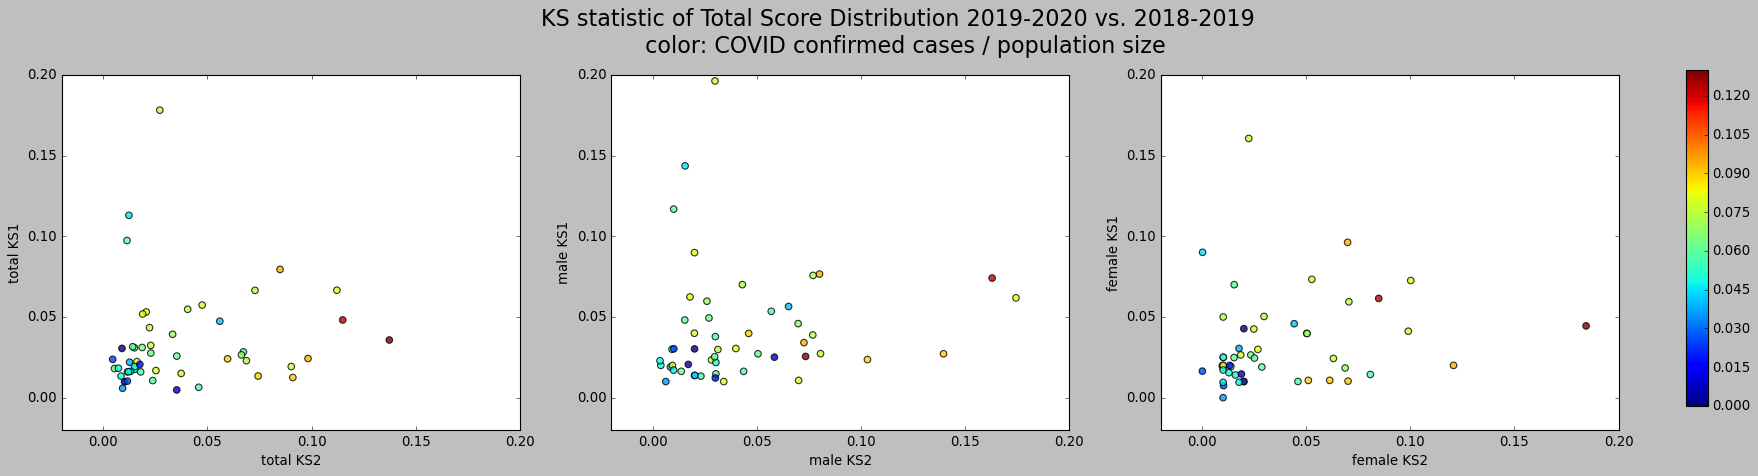

In [16]:
fig, axs = plt.subplots(1,3,figsize=(28,6))
plt.style.use('classic')
y = ks_df['totalKS_1819'].values
x = ks_df['totalKS_1920'].values
cov_deaths = covid_by_pop
colormap = plt.cm.jet
colour = cov_deaths
axs[0].scatter(ks_df['totalKS_1920'].values, ks_df['totalKS_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[0].set_xlabel('total KS2')
axs[0].set_ylabel('total KS1')
axs[1].scatter(ks_df['maleKS_1920'].values, ks_df['maleKS_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[1].set_xlabel('male KS2')
axs[1].set_ylabel('male KS1')
axs[2].scatter(ks_df['femaleKS_1920'].values, ks_df['femaleKS_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[2].set_xlabel('female KS2')
axs[2].set_ylabel('female KS1')
for ax in axs:
    ax.set_ylim(-0.02, 0.2)
    ax.set_xlim(-0.02, 0.2)
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=0, vmax=0.13)
fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(sm, cax=cbar_ax)
plt.suptitle('KS statistic of Total Score Distribution 2019-2020 vs. 2018-2019 \n color: COVID confirmed cases / population size',fontsize=20)
fig.subplots_adjust(top=0.84)
plt.show()

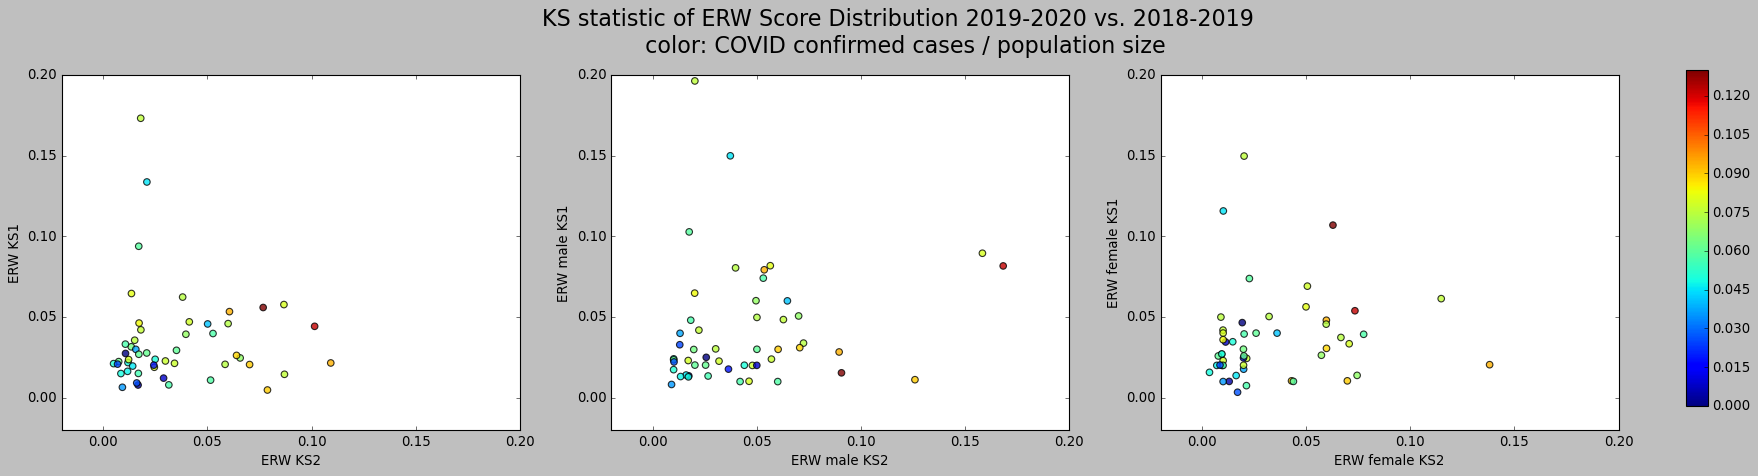

In [121]:
fig, axs = plt.subplots(1,3,figsize=(28,6))
plt.style.use('classic')
colormap = plt.cm.jet
colour = cov_deaths
axs[0].scatter(ks_df['erwKS_1920'].values, ks_df['erwKS_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[0].set_xlabel('ERW KS2')
axs[0].set_ylabel('ERW KS1')
axs[1].scatter(ks_df['erwKSmale_1920'].values, ks_df['erwKSmale_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[1].set_xlabel('ERW male KS2')
axs[1].set_ylabel('ERW male KS1')
axs[2].scatter(ks_df['erwKSfem_1920'].values, ks_df['erwKSfem_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[2].set_xlabel('ERW female KS2')
axs[2].set_ylabel('ERW female KS1')
for ax in axs:
    ax.set_ylim(-0.02, 0.2)
    ax.set_xlim(-0.02, 0.2)
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=0, vmax=0.13)
fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(sm, cax=cbar_ax)
plt.suptitle('KS statistic of ERW Score Distribution 2019-2020 vs. 2018-2019 \n color: COVID confirmed cases / population size',fontsize=20)
fig.subplots_adjust(top=0.84)
plt.show()

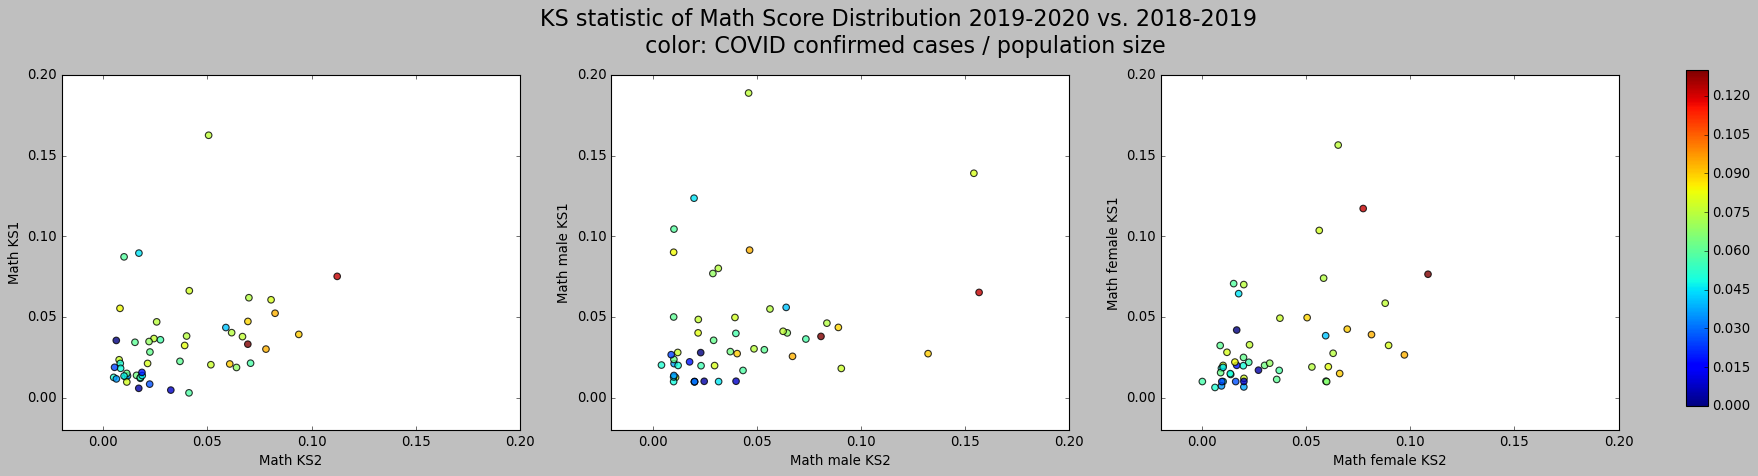

In [122]:
fig, axs = plt.subplots(1,3,figsize=(28,6))
plt.style.use('classic')
colormap = plt.cm.jet
colour = cov_deaths
axs[0].scatter(ks_df['mathKS_1920'].values, ks_df['mathKS_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[0].set_xlabel('Math KS2')
axs[0].set_ylabel('Math KS1')
axs[1].scatter(ks_df['mathKSmale_1920'].values, ks_df['mathKSmale_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[1].set_xlabel('Math male KS2')
axs[1].set_ylabel('Math male KS1')
axs[2].scatter(ks_df['mathKSfem_1920'].values, ks_df['mathKSfem_1819'].values, s = 35, c = colour, alpha = 0.8)
axs[2].set_xlabel('Math female KS2')
axs[2].set_ylabel('Math female KS1')
for ax in axs:
    ax.set_ylim(-0.02, 0.2)
    ax.set_xlim(-0.02, 0.2)
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=0, vmax=0.13)
fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(sm, cax=cbar_ax)
plt.suptitle('KS statistic of Math Score Distribution 2019-2020 vs. 2018-2019 \n color: COVID confirmed cases / population size',fontsize=20)
fig.subplots_adjust(top=0.84)
plt.show()

Spearman Rank Correlation Test: null hypothesis states that the two sets are uncorrelated.

Here COVID metric = COVID confirmed cases

In [13]:
print('rho of total Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['totalKS_1920'].values - ks_df['totalKS_1819'].values)[1])
print('rho of female Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['femaleKS_1920'].values - ks_df['femaleKS_1819'].values)[1])
print('rho of male Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['maleKS_1920'].values - ks_df['maleKS_1819'].values)[1])

print('rho of ERW Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['erwKS_1920'].values - ks_df['erwKS_1819'].values)[1])
print('rho of ERW male Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['erwKSmale_1920'].values - ks_df['erwKSmale_1819'].values)[1])
print('rho of ERW female Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['erwKSfem_1920'].values - ks_df['erwKSfem_1819'].values)[1])

print('rho of maths Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['mathKS_1920'].values - ks_df['mathKS_1819'].values)[1])
print('rho of maths male Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['mathKSmale_1920'].values - ks_df['mathKSmale_1819'].values)[1])
print('rho of maths female Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['mathKSfem_1920'].values - ks_df['mathKSfem_1819'].values)[1])

rho of total Delta(KS):  0.9587820176325161
rho of female Delta(KS):  0.7453619950287087
rho of male Delta(KS):  0.7965110410341909
rho of ERW Delta(KS):  0.8194785743201106
rho of ERW male Delta(KS):  0.5359972660507968
rho of ERW female Delta(KS):  0.5397630152676185
rho of maths Delta(KS):  0.676233571809856
rho of maths male Delta(KS):  0.39377947731323504
rho of maths female Delta(KS):  0.9301869010793464


Here COVID metric = COVID cofirmed by population cases

In [14]:
print('rho of total Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['totalKS_1920'].values - ks_df['totalKS_1819'].values)[1])
print('rho of female Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['femaleKS_1920'].values - ks_df['femaleKS_1819'].values)[1])
print('rho of male Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['maleKS_1920'].values - ks_df['maleKS_1819'].values)[1])

print('rho of ERW Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['erwKS_1920'].values - ks_df['erwKS_1819'].values)[1])
print('rho of ERW male Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['erwKSmale_1920'].values - ks_df['erwKSmale_1819'].values)[1])
print('rho of ERW female Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['erwKSfem_1920'].values - ks_df['erwKSfem_1819'].values)[1])

print('rho of maths Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['mathKS_1920'].values - ks_df['mathKS_1819'].values)[1])
print('rho of maths male Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['mathKSmale_1920'].values - ks_df['mathKSmale_1819'].values)[1])
print('rho of maths female Delta(KS): ',stats.spearmanr(cov_deaths, ks_df['mathKSfem_1920'].values - ks_df['mathKSfem_1819'].values)[1])

rho of total Delta(KS):  0.9587820176325161
rho of female Delta(KS):  0.7453619950287087
rho of male Delta(KS):  0.7965110410341909
rho of ERW Delta(KS):  0.8194785743201106
rho of ERW male Delta(KS):  0.5359972660507968
rho of ERW female Delta(KS):  0.5397630152676185
rho of maths Delta(KS):  0.676233571809856
rho of maths male Delta(KS):  0.39377947731323504
rho of maths female Delta(KS):  0.9301869010793464


#### Detailed look at changes in mean score

In [15]:
mean_df = pd.read_csv('sat_mean.csv')
mean_df = mean_df.sort_values(by='states')
mean_df.head()

,Unnamed: 0,states,year,tot_mean,erw_mean,math_mean,tot_fem,erw_fem,math_fem,tot_male,erw_male,math_male
90,90,Alabama,2017,1165,593,572,1143,589,554,1194,599,596
94,94,Alabama,2021,1159,591,568,1140,587,553,1184,595,589
92,92,Alabama,2019,1143,583,560,1128,581,547,1165,587,578
93,93,Alabama,2020,1127,576,551,1111,574,537,1150,579,571
91,91,Alabama,2018,1166,595,571,1142,589,553,1201,603,599


In [83]:
tot_mean2019 = mean_df[mean_df['year']==2019]['tot_mean'].values
tot_mean2020 = mean_df[mean_df['year']==2020]['tot_mean'].values
delta_1920 = tot_mean2020 - tot_mean2019
dict_plot_map = {'states':states_arr2, 'covid_by_pop': covid_by_pop, 'delta_1920':delta_1920,'population':population}
df_plot_map = pd.DataFrame.from_dict(dict_plot_map)
df_plot_map.to_excel('US_toCheck.xlsx')

Compare the rank correlation of score drop and COVID intensity, and of score drop with 2019 mean

In [51]:
print(stats.spearmanr(tot_mean2020 - tot_mean2019, covid_by_pop)[0])
print(stats.spearmanr(erw_mean2020-erw_mean2019, covid_by_pop)[0])
print(stats.spearmanr(math_mean2020-math_mean2019, covid_by_pop)[0])
print(stats.spearmanr(tot_fem2020-tot_fem2019, covid_by_pop)[0])
print(stats.spearmanr(erw_fem2020-erw_fem2019, covid_by_pop)[0])
print(stats.spearmanr(math_fem2020-math_fem2019, covid_by_pop)[0])
print(stats.spearmanr(tot_male2020-tot_male2019, covid_by_pop)[0])
print(stats.spearmanr(erw_male2020-erw_male2019, covid_by_pop)[0])
print(stats.spearmanr(math_male2020-math_male2019, covid_by_pop)[0])

-0.4172372597015595
-0.4155282976855172
-0.3972878294153848
-0.3684009968894425
-0.37236488862882827
-0.36618624605188943
-0.2919350227667105
-0.3318984380313949
-0.23576972012915595


In [141]:
print(stats.spearmanr(delta_1920, covid_by_pop)[1])
print(stats.spearmanr(erw_mean2020-erw_mean2019, covid_by_pop)[1])
print(stats.spearmanr(math_mean2020-math_mean2019, covid_by_pop)[1])
print(stats.spearmanr(tot_fem2020-tot_fem2019, covid_by_pop)[1])
print(stats.spearmanr(erw_fem2020-erw_fem2019, covid_by_pop)[1])
print(stats.spearmanr(math_fem2020-math_fem2019, covid_by_pop)[1])
print(stats.spearmanr(tot_male2020-tot_male2019, covid_by_pop)[1])
print(stats.spearmanr(erw_male2020-erw_male2019, covid_by_pop)[1])
print(stats.spearmanr(math_male2020-math_male2019, covid_by_pop)[1])

0.002318712366672955
0.0024269393449613814
0.003892875600996429
0.007815116652372518
0.007127854132085226
0.008223605657203585
0.037647942357164135
0.017343350260708785
0.095800491230188


In [143]:
print('P-value of total mean' ,stats.spearmanr(tot_mean2019, tot_mean2020 - tot_mean2019)[0])
print('P-value of ERW mean' ,stats.spearmanr(erw_mean2019, erw_mean2020 - erw_mean2019)[0])
print('P-value of maths mean' ,stats.spearmanr(math_mean2019, math_mean2020 - math_mean2019)[0])
print('\n')
#By gender
#girls
print('P-value of total female mean' ,stats.spearmanr(tot_fem2019, tot_fem2020 - tot_fem2019)[0])
print('P-value of ERW female mean' ,stats.spearmanr(erw_fem2019, erw_fem2020 - erw_fem2019)[0])
print('P-value of maths female mean' ,stats.spearmanr(math_fem2019, math_fem2020 - math_fem2019)[0])
print('\n')
print('P-value of total male mean' ,stats.spearmanr(tot_male2019, tot_male2020 - tot_male2019)[0])
print('P-value of ERW male mean' ,stats.spearmanr(erw_male2019, erw_male2020 - erw_male2019)[0])
print('P-value of maths male mean' ,stats.spearmanr(math_male2019, math_male2020 - math_male2019)[0])

P-value of total mean -0.46889060293638557
P-value of ERW mean -0.44533709594507387
P-value of maths mean -0.5359393373991356


P-value of total female mean -0.51048722972968
P-value of ERW female mean -0.4952428425647711
P-value of maths female mean -0.5101305834098775


P-value of total male mean -0.4164366193253086
P-value of ERW male mean -0.38739344580394275
P-value of maths male mean -0.39517768371581946


In [139]:
print('P-value of total mean' ,stats.spearmanr(tot_mean2019, tot_mean2020 - tot_mean2019)[1])
print('P-value of ERW mean' ,stats.spearmanr(erw_mean2019, erw_mean2020 - erw_mean2019)[1])
print('P-value of maths mean' ,stats.spearmanr(math_mean2019, math_mean2020 - math_mean2019)[1])
print('\n')
#By gender
#girls
print('P-value of total female mean' ,stats.spearmanr(tot_fem2019, tot_fem2020 - tot_fem2019)[1])
print('P-value of ERW female mean' ,stats.spearmanr(erw_fem2019, erw_fem2020 - erw_fem2019)[1])
print('P-value of maths female mean' ,stats.spearmanr(math_fem2019, math_fem2020 - math_fem2019)[1])
print('\n')
print('P-value of total male mean' ,stats.spearmanr(tot_male2019, tot_male2020 - tot_male2019)[1])
print('P-value of ERW male mean' ,stats.spearmanr(erw_male2019, erw_male2020 - erw_male2019)[1])
print('P-value of maths male mean' ,stats.spearmanr(math_male2019, math_male2020 - math_male2019)[1])

P-value of total mean 0.0005193768343726071
P-value of ERW mean 0.0010577577499570278
P-value of maths mean 5.05428895658959e-05


P-value of total female mean 0.00012961845240064488
P-value of ERW female mean 0.00022007750944237538
P-value of maths female mean 0.00013127148004845183


P-value of total male mean 0.0023688712275050446
P-value of ERW male mean 0.00497668221158285
P-value of maths male mean 0.004104765990209073


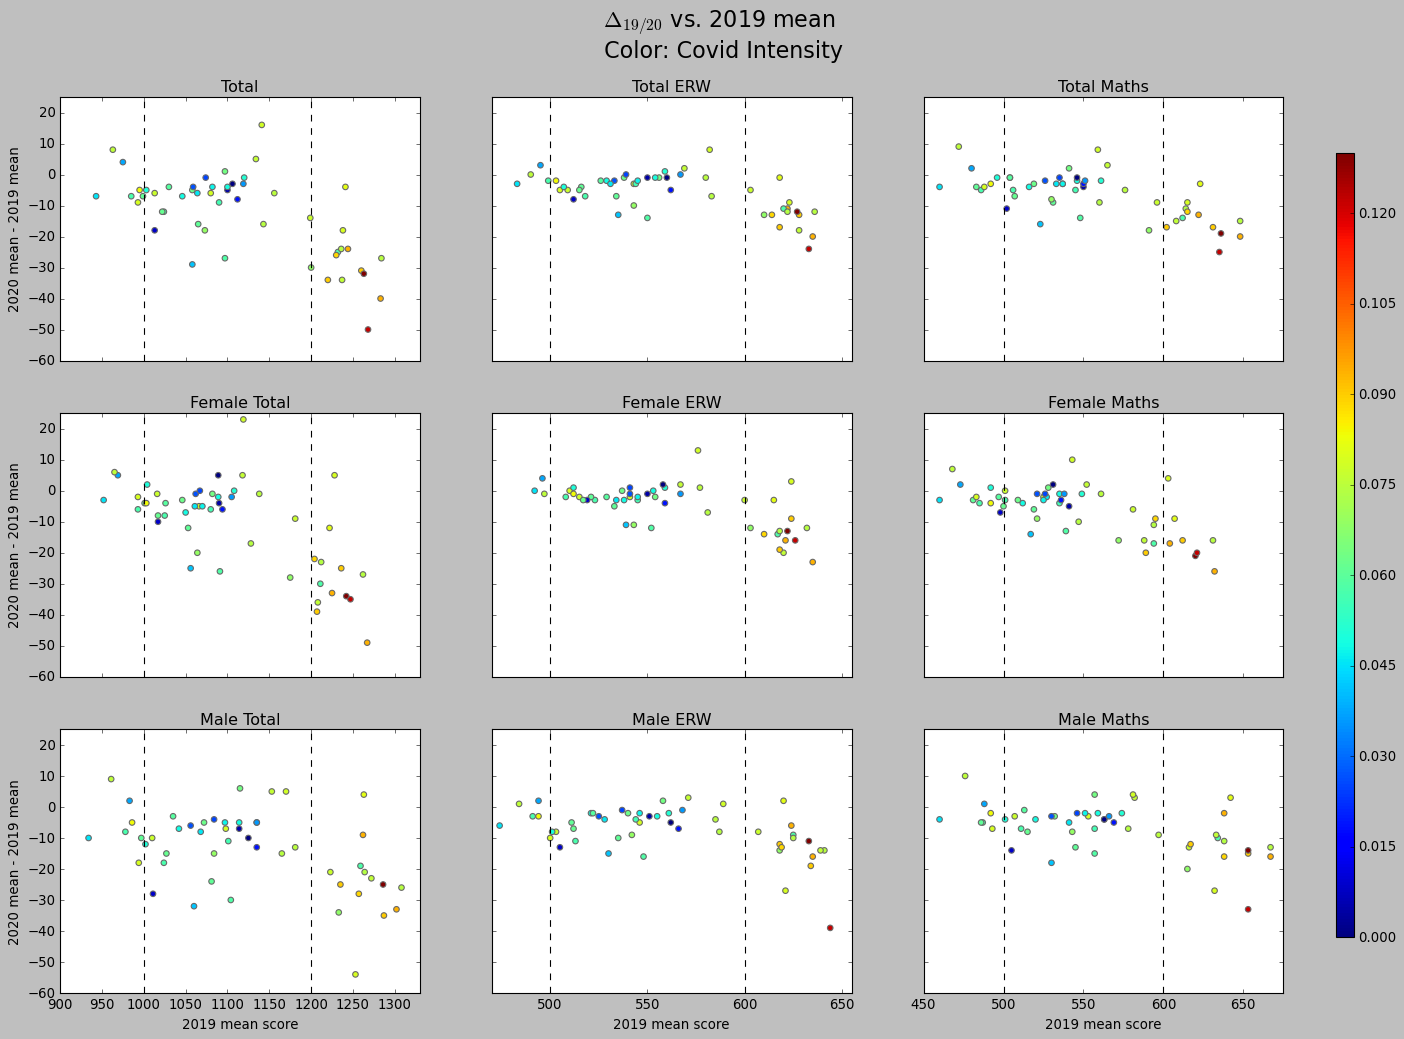

In [129]:
fig, axs = plt.subplots(3,3,figsize=(22,14))
colormap = plt.cm.jet
colour = cov_deaths
axs[0,0].scatter(tot_mean2019, tot_mean2020 - tot_mean2019,s=25, c= colour, edgecolor='dimgrey')
axs[0,0].set_title('Total')
axs[0,1].scatter(erw_mean2019, erw_mean2020 - erw_mean2019, s=25,c= colour,edgecolor='dimgrey')
axs[0,1].set_title('Total ERW')
axs[0,2].scatter(math_mean2019, math_mean2020 - math_mean2019, s=25,c= colour,edgecolor='dimgrey')
axs[0,2].set_title('Total Maths')

axs[1,0].scatter(tot_fem2019, tot_fem2020 - tot_fem2019,s=25,c= colour,edgecolor='dimgrey')
axs[1,0].set_title('Female Total')
axs[1,1].scatter(erw_fem2019, erw_fem2020 - erw_fem2019, s=25,c= colour,edgecolor='dimgrey')
axs[1,1].set_title('Female ERW')
axs[1,2].scatter(math_fem2019, math_fem2020 - math_fem2019, s=25,c= colour,edgecolor='dimgrey')
axs[1,2].set_title('Female Maths')
axs[2,0].scatter(tot_male2019, tot_male2020 - tot_male2019,s=25,c= colour, edgecolor='dimgrey')
axs[2,0].set_title('Male Total')
axs[2,1].scatter(erw_male2019, erw_male2020 - erw_male2019, s=25,c= colour, edgecolor='dimgrey')
axs[2,1].set_title('Male ERW')
axs[2,2].scatter(math_male2019, math_male2020 - math_male2019, s=25,c= colour,edgecolor='dimgrey')
axs[2,2].set_title('Male Maths')
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=0, vmax=0.13)
for ax in axs.flat:
    ax.set_ylim([-60,25])
    ax.set(xlabel='2019 mean score', ylabel='2020 mean - 2019 mean')
for ax in fig.get_axes():
    ax.label_outer()

fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(sm, cax=cbar_ax)

for i in range(3):
    axs[i,0].axvline(x=1200, linestyle='--',linewidth=1,color='black')
    axs[i,0].axvline(x=1000, linestyle='--',linewidth=1,color='black')
    axs[i,0].set_xlim([900,1330])

for i in range(3):
    for j in range(1,3):
        if j == 1:
            axs[i,j].set_xlim([470,655])
        if j == 2:
            axs[i,j].set_xlim([450,675])
        axs[i,j].axvline(x=500, linestyle='--',linewidth=1,color='black')
        axs[i,j].axvline(x=600, linestyle='--',linewidth=1,color='black')
plt.suptitle('$\Delta_{19/20}$ vs. 2019 mean \n Color: Covid Intensity',fontsize=20);

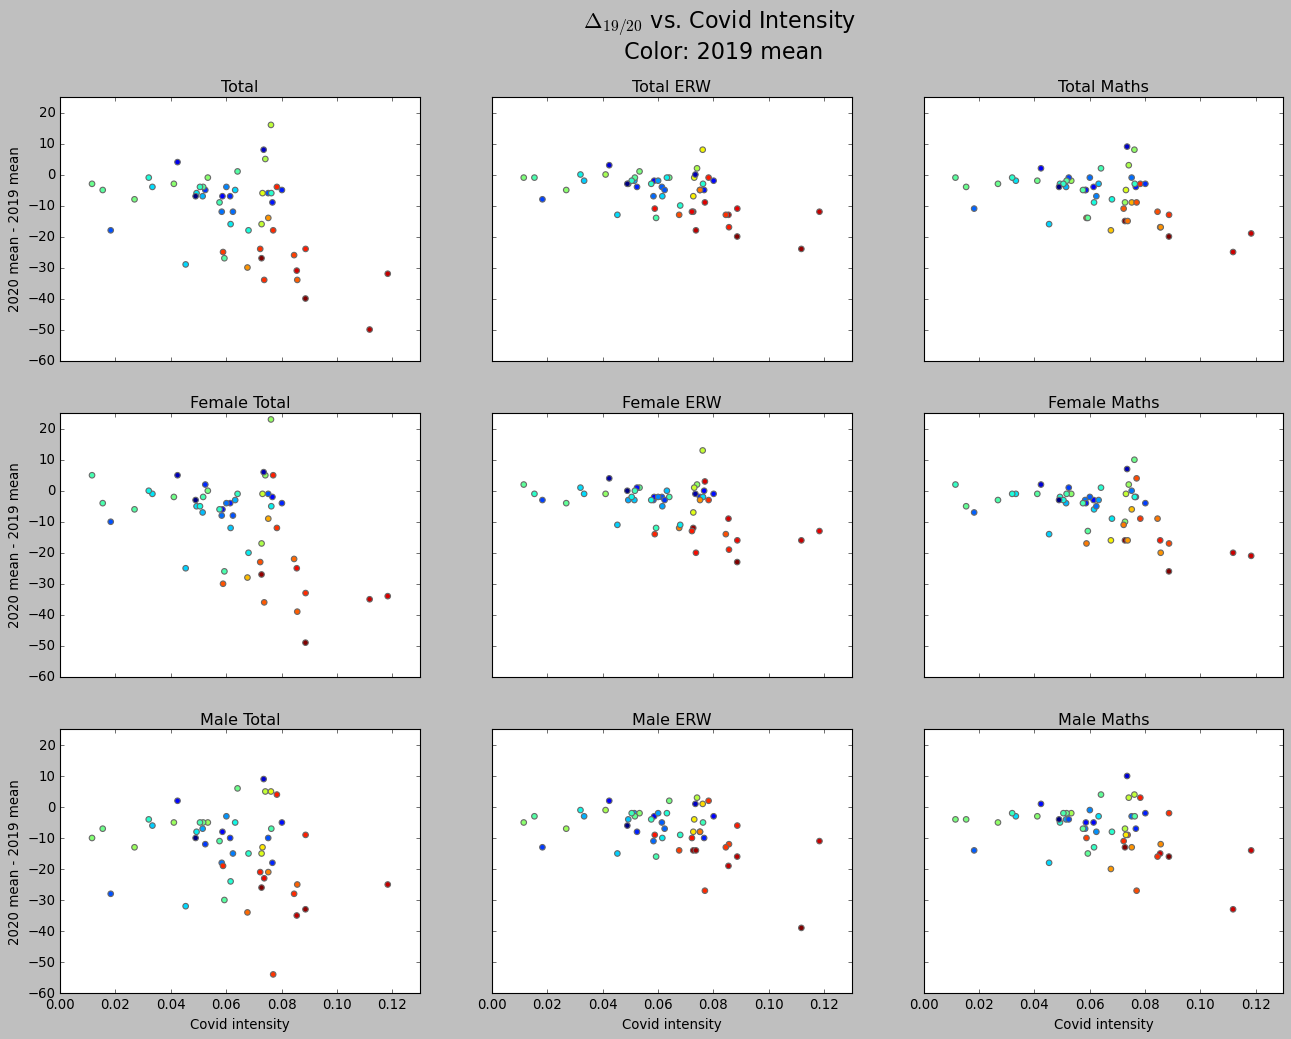

In [133]:
fig, axs = plt.subplots(3,3,figsize=(22,14))
colormap = plt.cm.jet
axs[0,0].scatter(cov_deaths, tot_mean2020 - tot_mean2019,s=25, c=tot_mean2019, edgecolor='dimgrey')
axs[0,0].set_title('Total')
axs[0,1].scatter(cov_deaths, erw_mean2020 - erw_mean2019, s=25,c=erw_mean2019,edgecolor='dimgrey')
axs[0,1].set_title('Total ERW')
axs[0,2].scatter(cov_deaths, math_mean2020 - math_mean2019, s=25,c= math_mean2019,edgecolor='dimgrey')
axs[0,2].set_title('Total Maths')

axs[1,0].scatter(cov_deaths, tot_fem2020 - tot_fem2019,s=25,c=tot_fem2019,edgecolor='dimgrey')
axs[1,0].set_title('Female Total')
axs[1,1].scatter(cov_deaths, erw_fem2020 - erw_fem2019, s=25,c=erw_fem2019,edgecolor='dimgrey')
axs[1,1].set_title('Female ERW')
axs[1,2].scatter(cov_deaths, math_fem2020 - math_fem2019, s=25,c=math_fem2019,edgecolor='dimgrey')
axs[1,2].set_title('Female Maths')
axs[2,0].scatter(cov_deaths, tot_male2020 - tot_male2019,s=25,c=tot_male2019, edgecolor='dimgrey')
axs[2,0].set_title('Male Total')
axs[2,1].scatter(cov_deaths, erw_male2020 - erw_male2019, s=25,c=erw_male2019, edgecolor='dimgrey')
axs[2,1].set_title('Male ERW')
axs[2,2].scatter(cov_deaths, math_male2020 - math_male2019, s=25,c=math_male2019,edgecolor='dimgrey')
axs[2,2].set_title('Male Maths')
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=450, vmax=1300)
for ax in axs.flat:
    ax.set_ylim([-60,25])
    ax.set(xlabel='Covid intensity', ylabel='2020 mean - 2019 mean')
for ax in fig.get_axes():
    ax.label_outer()

fig.subplots_adjust(right=0.82)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
# fig.colorbar(sm, cax=cbar_ax)

for i in range(3):
    axs[i,0].axvline(x=1200, linestyle='--',linewidth=1,color='black')
    axs[i,0].axvline(x=1000, linestyle='--',linewidth=1,color='black')
    axs[i,0].set_xlim([0,0.13])

for i in range(3):
    for j in range(1,3):
        if j == 1:
            axs[i,j].set_xlim([0,0.13])
        if j == 2:
            axs[i,j].set_xlim([0,0.13])
        axs[i,j].axvline(x=500, linestyle='--',linewidth=1,color='black')
        axs[i,j].axvline(x=600, linestyle='--',linewidth=1,color='black')
plt.suptitle('$\Delta_{19/20}$ vs. Covid Intensity \n Color: 2019 mean',fontsize=20);

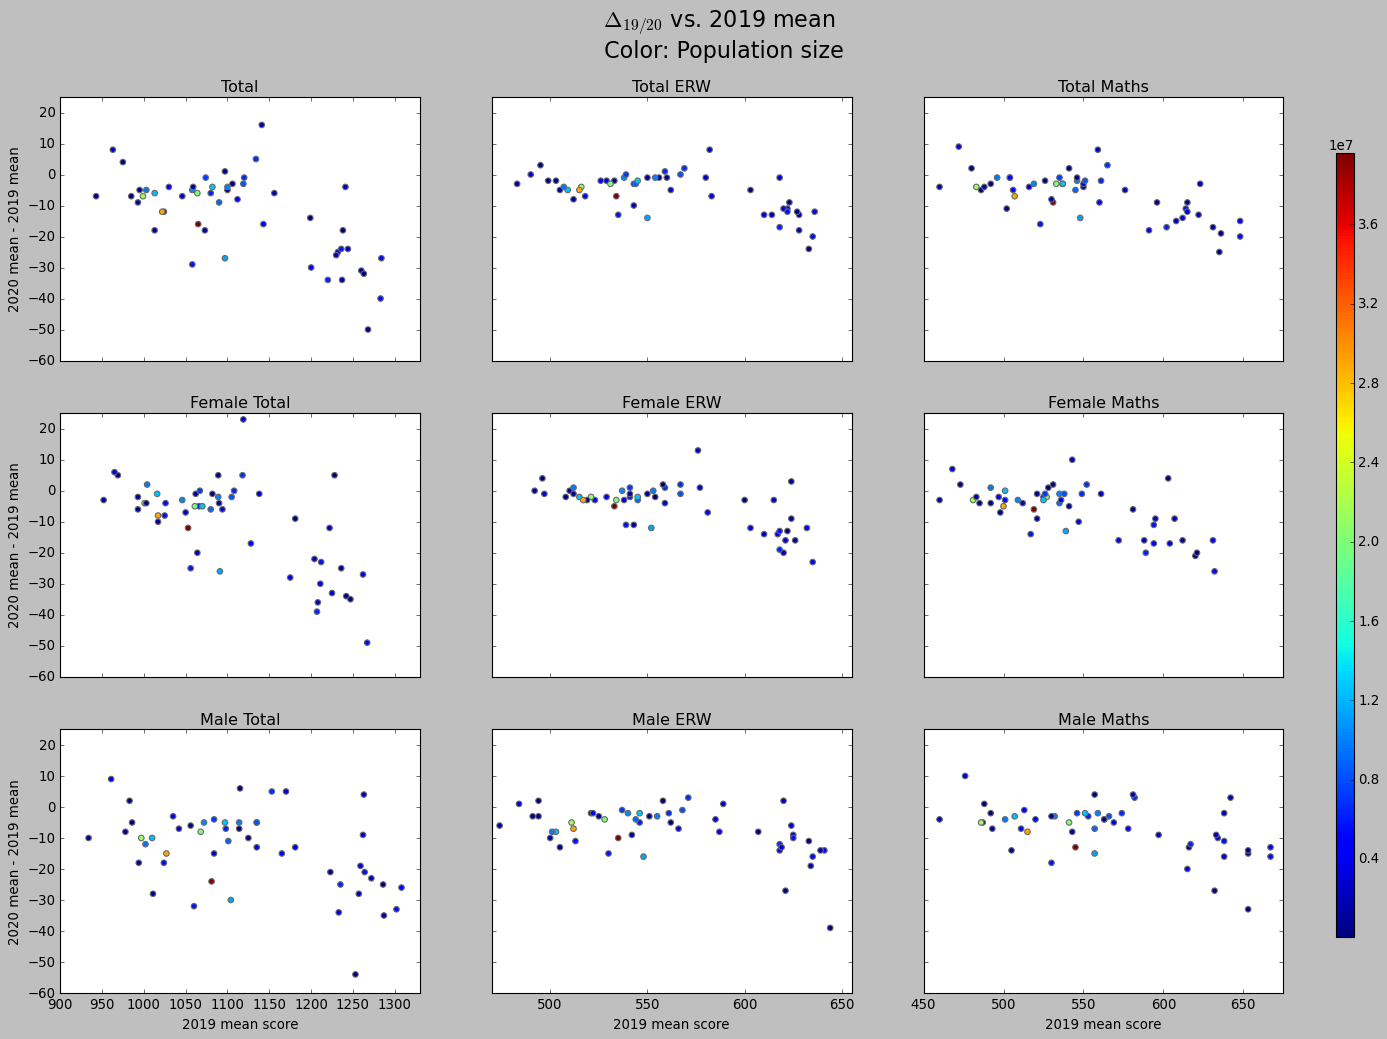

In [131]:
fig, axs = plt.subplots(3,3,figsize=(22,14))
colormap = plt.cm.jet
colour = population
axs[0,0].scatter(tot_mean2019, tot_mean2020 - tot_mean2019,s=25, c= colour, edgecolor='dimgrey')
axs[0,0].set_title('Total')
axs[0,1].scatter(erw_mean2019, erw_mean2020 - erw_mean2019, s=25,c= colour,edgecolor='dimgrey')
axs[0,1].set_title('Total ERW')
axs[0,2].scatter(math_mean2019, math_mean2020 - math_mean2019, s=25,c= colour,edgecolor='dimgrey')
axs[0,2].set_title('Total Maths')

axs[1,0].scatter(tot_fem2019, tot_fem2020 - tot_fem2019,s=25,c= colour,edgecolor='dimgrey')
axs[1,0].set_title('Female Total')
axs[1,1].scatter(erw_fem2019, erw_fem2020 - erw_fem2019, s=25,c= colour,edgecolor='dimgrey')
axs[1,1].set_title('Female ERW')
axs[1,2].scatter(math_fem2019, math_fem2020 - math_fem2019, s=25,c= colour,edgecolor='dimgrey')
axs[1,2].set_title('Female Maths')
axs[2,0].scatter(tot_male2019, tot_male2020 - tot_male2019,s=25,c= colour, edgecolor='dimgrey')
axs[2,0].set_title('Male Total')
axs[2,1].scatter(erw_male2019, erw_male2020 - erw_male2019, s=25,c= colour, edgecolor='dimgrey')
axs[2,1].set_title('Male ERW')
axs[2,2].scatter(math_male2019, math_male2020 - math_male2019, s=25,c= colour,edgecolor='dimgrey')
axs[2,2].set_title('Male Maths')
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=57600, vmax=39600000)
for ax in axs.flat:
    ax.set_ylim([-60,25])
    ax.set(xlabel='2019 mean score', ylabel='2020 mean - 2019 mean')
for ax in fig.get_axes():
    ax.label_outer()

fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(sm, cax=cbar_ax)

for i in range(3):
#     axs[i,0].axvline(x=1200, linestyle='--',linewidth=1,color='black')
#     axs[i,0].axvline(x=1000, linestyle='--',linewidth=1,color='black')
    axs[i,0].set_xlim([900,1330])

for i in range(3):
    for j in range(1,3):
        if j == 1:
            axs[i,j].set_xlim([470,655])
        if j == 2:
            axs[i,j].set_xlim([450,675])
#         axs[i,j].axvline(x=500, linestyle='--',linewidth=1,color='black')
#         axs[i,j].axvline(x=600, linestyle='--',linewidth=1,color='black')
plt.suptitle('$\Delta_{19/20}$ vs. 2019 mean \n Color: Population size',fontsize=20);

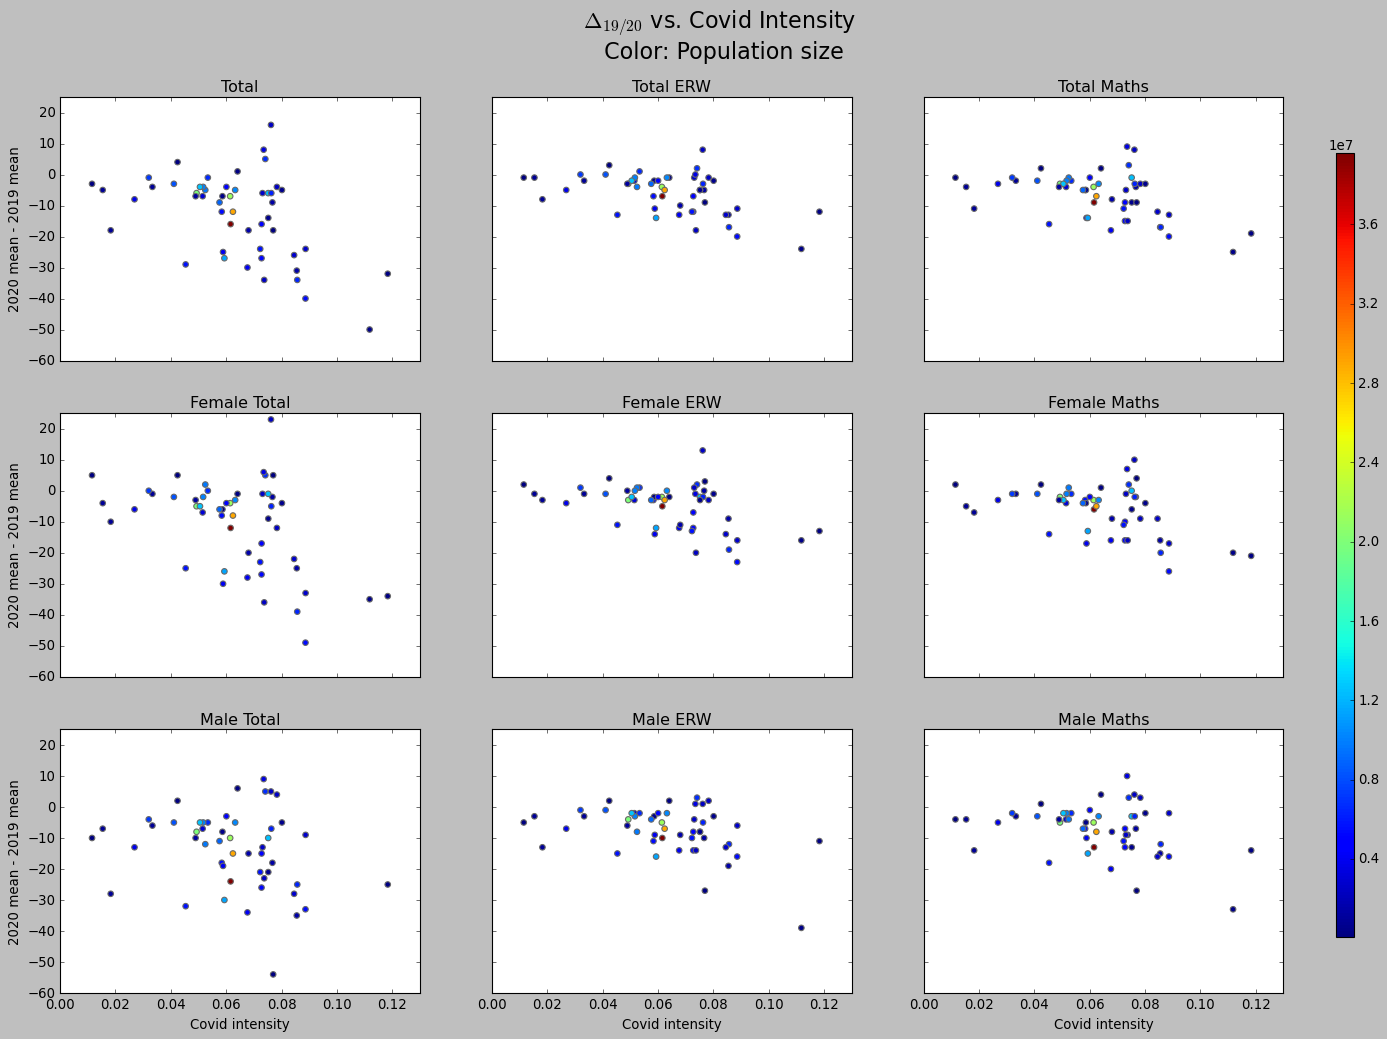

In [132]:
fig, axs = plt.subplots(3,3,figsize=(22,14))
colormap = plt.cm.jet
colour = population
axs[0,0].scatter(cov_deaths, tot_mean2020 - tot_mean2019,s=25, c= colour, edgecolor='dimgrey')
axs[0,0].set_title('Total')
axs[0,1].scatter(cov_deaths, erw_mean2020 - erw_mean2019, s=25,c= colour,edgecolor='dimgrey')
axs[0,1].set_title('Total ERW')
axs[0,2].scatter(cov_deaths, math_mean2020 - math_mean2019, s=25,c= colour,edgecolor='dimgrey')
axs[0,2].set_title('Total Maths')

axs[1,0].scatter(cov_deaths, tot_fem2020 - tot_fem2019,s=25,c= colour,edgecolor='dimgrey')
axs[1,0].set_title('Female Total')
axs[1,1].scatter(cov_deaths, erw_fem2020 - erw_fem2019, s=25,c= colour,edgecolor='dimgrey')
axs[1,1].set_title('Female ERW')
axs[1,2].scatter(cov_deaths,  math_fem2020 - math_fem2019, s=25,c= colour,edgecolor='dimgrey')
axs[1,2].set_title('Female Maths')
axs[2,0].scatter(cov_deaths, tot_male2020 - tot_male2019,s=25,c= colour, edgecolor='dimgrey')
axs[2,0].set_title('Male Total')
axs[2,1].scatter(cov_deaths, erw_male2020 - erw_male2019, s=25,c= colour, edgecolor='dimgrey')
axs[2,1].set_title('Male ERW')
axs[2,2].scatter(cov_deaths, math_male2020 - math_male2019, s=25,c= colour,edgecolor='dimgrey')
axs[2,2].set_title('Male Maths')
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=57600, vmax=39600000)
for ax in axs.flat:
    ax.set(xlabel='Covid intensity', ylabel='2020 mean - 2019 mean')
for ax in fig.get_axes():
    ax.label_outer()

fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(sm, cax=cbar_ax)

for i in range(3):
    axs[i,0].axvline(x=1200, linestyle='--',linewidth=1,color='black')
    axs[i,0].axvline(x=1000, linestyle='--',linewidth=1,color='black')
    axs[i,0].set_xlim([0,0.13])
    axs[i,0].set_ylim([-60,25])

for i in range(3):
    for j in range(1,3):
        if j == 1:
            axs[i,j].set_xlim([0,0.13])
            axs[i,j].set_ylim([-60,25])
        if j == 2:
            axs[i,j].set_xlim([0,0.13])
            axs[i,j].set_ylim([-60,25])
        axs[i,j].axvline(x=500, linestyle='--',linewidth=1,color='black')
        axs[i,j].axvline(x=600, linestyle='--',linewidth=1,color='black')
plt.suptitle('$\Delta_{19/20}$ vs. Covid Intensity \n Color: Population size',fontsize=20);

In [55]:
print('rho of population vs COVID intensity: ' ,stats.spearmanr(population, covid_by_pop)[0])
print('P-value of population vs COVID intensity: ' ,stats.spearmanr(population, covid_by_pop)[1])

rho of population vs COVID intensity:  -0.1690497737556561
P-value of population vs COVID intensity:  0.23566747845021477


In [56]:
print('P-value of total mean' ,stats.spearmanr(tot_mean2019, population)[1])
print('P-value of ERW mean' ,stats.spearmanr(erw_mean2019, population)[1])
print('P-value of maths mean' ,stats.spearmanr(math_mean2019, population)[1])
print('\n')
#By gender
#girls
print('P-value of total female mean' ,stats.spearmanr(tot_fem2019, population)[1])
print('P-value of ERW female mean' ,stats.spearmanr(erw_fem2019, population)[1])
print('P-value of maths female mean' ,stats.spearmanr(math_fem2019, population)[1])
print('\n')
print('P-value of total male mean' ,stats.spearmanr(tot_male2019, population)[1])
print('P-value of ERW male mean' ,stats.spearmanr(erw_male2019, population)[1])
print('P-value of maths male mean' ,stats.spearmanr(math_male2019,population)[1])

P-value of total mean 0.2959016393130346
P-value of ERW mean 0.28883686742995757
P-value of maths mean 0.3493412537866277


P-value of total female mean 0.26642167264535593
P-value of ERW female mean 0.2285105636409728
P-value of maths female mean 0.32551694417307175


P-value of total male mean 0.3183259137442559
P-value of ERW male mean 0.29619794866184423
P-value of maths male mean 0.3218091450035364


### General effect of COVID on academic performance

By subjects

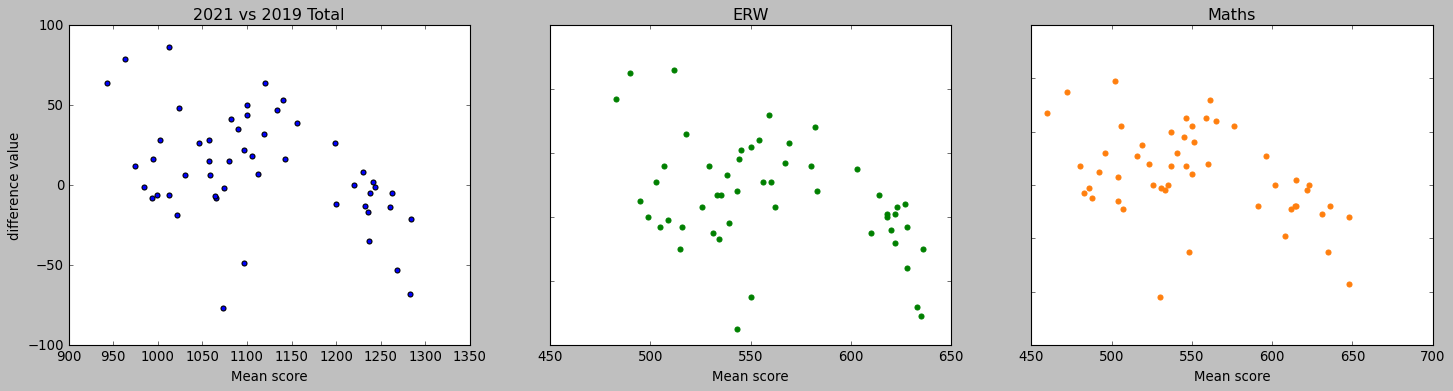

In [64]:
tot_mean2019 = mean_df[mean_df['year']==2019]['tot_mean'].values
tot_mean2021 = mean_df[mean_df['year']==2021]['tot_mean'].values
erw_mean2019 = mean_df[mean_df['year']==2019]['erw_mean'].values
erw_mean2021 = mean_df[mean_df['year']==2021]['erw_mean'].values
math_mean2019 = mean_df[mean_df['year']==2019]['math_mean'].values
math_mean2021 = mean_df[mean_df['year']==2021]['math_mean'].values
fig, axs = plt.subplots(1,3,figsize=(22,5))
axs[0].scatter(tot_mean2019, tot_mean2021 - tot_mean2019)
axs[0].set_title('2021 vs 2019 Total')
axs[1].scatter(erw_mean2019, erw_mean2021 - erw_mean2019, color='green')
axs[1].set_title('ERW')
axs[2].scatter(math_mean2019, math_mean2021 - math_mean2019, color='tab:orange')
axs[2].set_title('Maths')
for ax in axs.flat:
    ax.set(xlabel='Mean score', ylabel='difference value')
for ax in fig.get_axes():
    ax.label_outer()

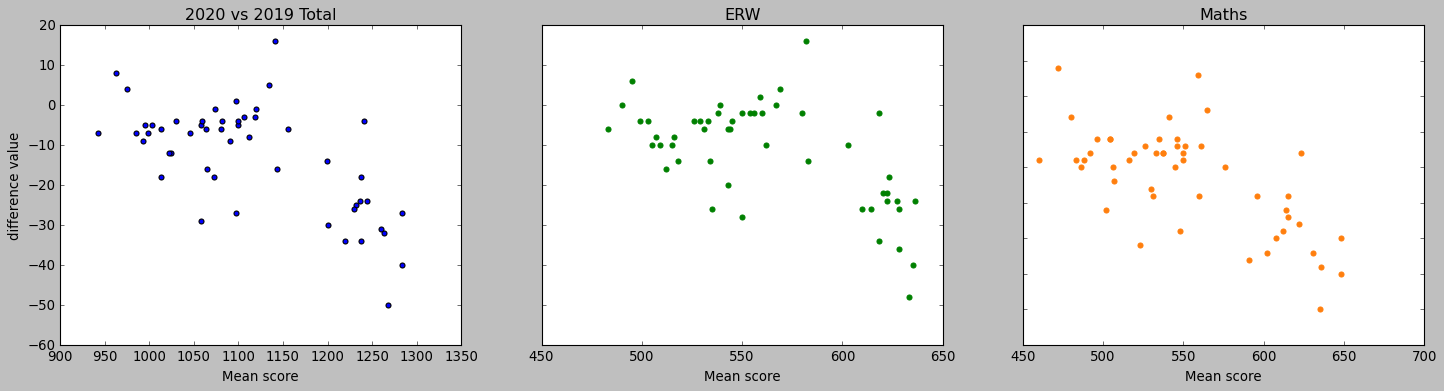

In [43]:
tot_mean2019 = mean_df[mean_df['year']==2019]['tot_mean'].values
tot_mean2020 = mean_df[mean_df['year']==2020]['tot_mean'].values
erw_mean2019 = mean_df[mean_df['year']==2019]['erw_mean'].values
erw_mean2020 = mean_df[mean_df['year']==2020]['erw_mean'].values
math_mean2019 = mean_df[mean_df['year']==2019]['math_mean'].values
math_mean2020 = mean_df[mean_df['year']==2020]['math_mean'].values
fig, axs = plt.subplots(1,3,figsize=(22,5))
axs[0].scatter(tot_mean2019, tot_mean2020 - tot_mean2019)
axs[0].set_title('2020 vs 2019 Total')
axs[1].scatter(erw_mean2019, erw_mean2020 - erw_mean2019, color='green')
axs[1].set_title('ERW')
axs[2].scatter(math_mean2019, math_mean2020 - math_mean2019, color='tab:orange')
axs[2].set_title('Maths')
for ax in axs.flat:
    ax.set(xlabel='Mean score', ylabel='difference value')
for ax in fig.get_axes():
    ax.label_outer()

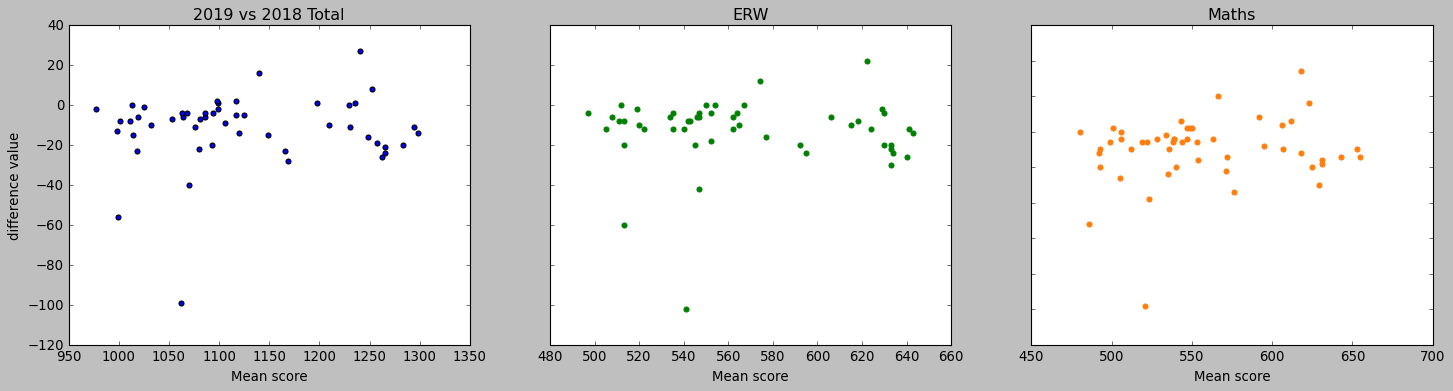

In [66]:
tot_mean2018 = mean_df[mean_df['year']==2018]['tot_mean'].values
tot_mean2019 = mean_df[mean_df['year']==2019]['tot_mean'].values
erw_mean2018 = mean_df[mean_df['year']==2018]['erw_mean'].values
erw_mean2019 = mean_df[mean_df['year']==2019]['erw_mean'].values
math_mean2018 = mean_df[mean_df['year']==2018]['math_mean'].values
math_mean2019 = mean_df[mean_df['year']==2019]['math_mean'].values
fig, axs = plt.subplots(1,3,figsize=(22,5))
axs[0].scatter(tot_mean2018, tot_mean2019 - tot_mean2018)
axs[0].set_title('2019 vs 2018 Total')
axs[1].scatter(erw_mean2018, erw_mean2019 - erw_mean2018, color='green')
axs[1].set_title('ERW')
axs[2].scatter(math_mean2018, math_mean2019 - math_mean2018, color='tab:orange')
axs[2].set_title('Maths')
for ax in axs.flat:
    ax.set(xlabel='Mean score', ylabel='difference value')
for ax in fig.get_axes():
    ax.label_outer()

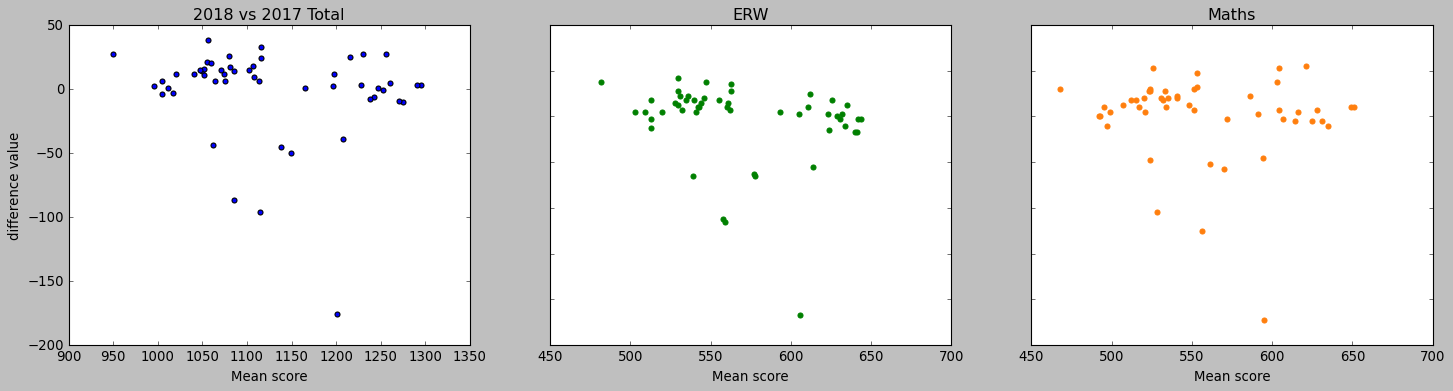

In [67]:
tot_mean2017 = mean_df[mean_df['year']==2017]['tot_mean'].values
tot_mean2018 = mean_df[mean_df['year']==2018]['tot_mean'].values
erw_mean2017 = mean_df[mean_df['year']==2017]['erw_mean'].values
erw_mean2018 = mean_df[mean_df['year']==2018]['erw_mean'].values
math_mean2017 = mean_df[mean_df['year']==2017]['math_mean'].values
math_mean2018 = mean_df[mean_df['year']==2018]['math_mean'].values
fig, axs = plt.subplots(1,3,figsize=(22,5))
axs[0].scatter(tot_mean2017, tot_mean2018 - tot_mean2017)
axs[0].set_title('2018 vs 2017 Total')
axs[1].scatter(erw_mean2017, erw_mean2018 - erw_mean2017, color='green')
axs[1].set_title('ERW')
axs[2].scatter(math_mean2017, math_mean2018 - math_mean2017, color='tab:orange')
axs[2].set_title('Maths')
for ax in axs.flat:
    ax.set(xlabel='Mean score', ylabel='difference value')
for ax in fig.get_axes():
    ax.label_outer()

By gender

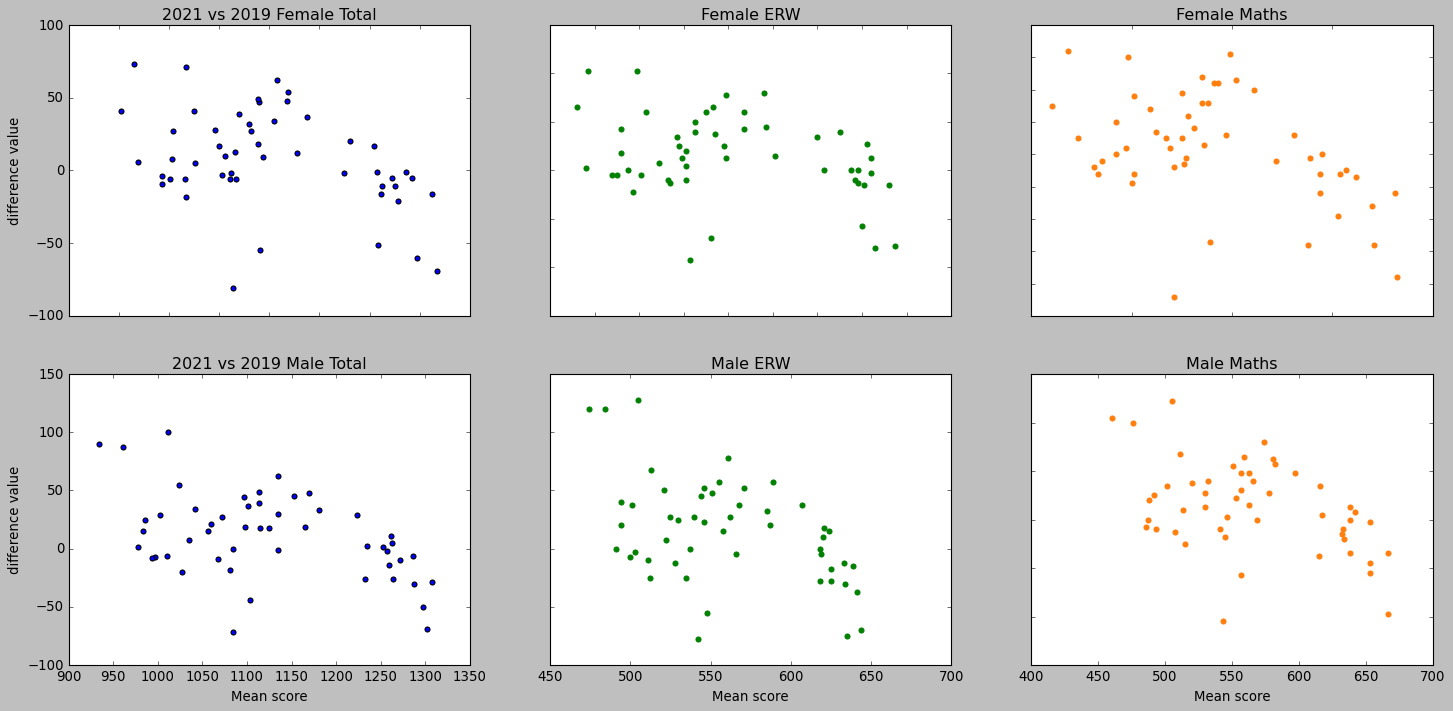

In [68]:
tot_fem2019 = mean_df[mean_df['year']==2019]['tot_fem'].values
tot_fem2021 = mean_df[mean_df['year']==2021]['tot_fem'].values
erw_fem2019 = mean_df[mean_df['year']==2019]['erw_fem'].values
erw_fem2021 = mean_df[mean_df['year']==2021]['erw_fem'].values
math_fem2019 = mean_df[mean_df['year']==2019]['math_fem'].values
math_fem2021 = mean_df[mean_df['year']==2021]['math_fem'].values

tot_male2019 = mean_df[mean_df['year']==2019]['tot_male'].values
tot_male2021 = mean_df[mean_df['year']==2021]['tot_male'].values
erw_male2019 = mean_df[mean_df['year']==2019]['erw_male'].values
erw_male2021 = mean_df[mean_df['year']==2021]['erw_male'].values
math_male2019 = mean_df[mean_df['year']==2019]['math_male'].values
math_male2021 = mean_df[mean_df['year']==2021]['math_male'].values

fig, axs = plt.subplots(2,3,figsize=(22,10))
axs[0,0].scatter(tot_fem2019, tot_fem2021 - tot_fem2019)
axs[0,0].set_title('2021 vs 2019 Female Total')
axs[0,1].scatter(erw_fem2019, erw_fem2021 - erw_fem2019, color='green')
axs[0,1].set_title('Female ERW')
axs[0,2].scatter(math_fem2019, math_fem2021 - math_fem2019, color='tab:orange')
axs[0,2].set_title('Female Maths')
axs[1,0].scatter(tot_male2019, tot_male2021 - tot_male2019)
axs[1,0].set_title('2021 vs 2019 Male Total')
axs[1,1].scatter(erw_male2019, erw_male2021 - erw_male2019, color='green')
axs[1,1].set_title('Male ERW')
axs[1,2].scatter(math_male2019, math_male2021 - math_male2019, color='tab:orange')
axs[1,2].set_title('Male Maths')

for ax in axs.flat:
    ax.set(xlabel='Mean score', ylabel='difference value')
for ax in fig.get_axes():
    ax.label_outer()

The main plot

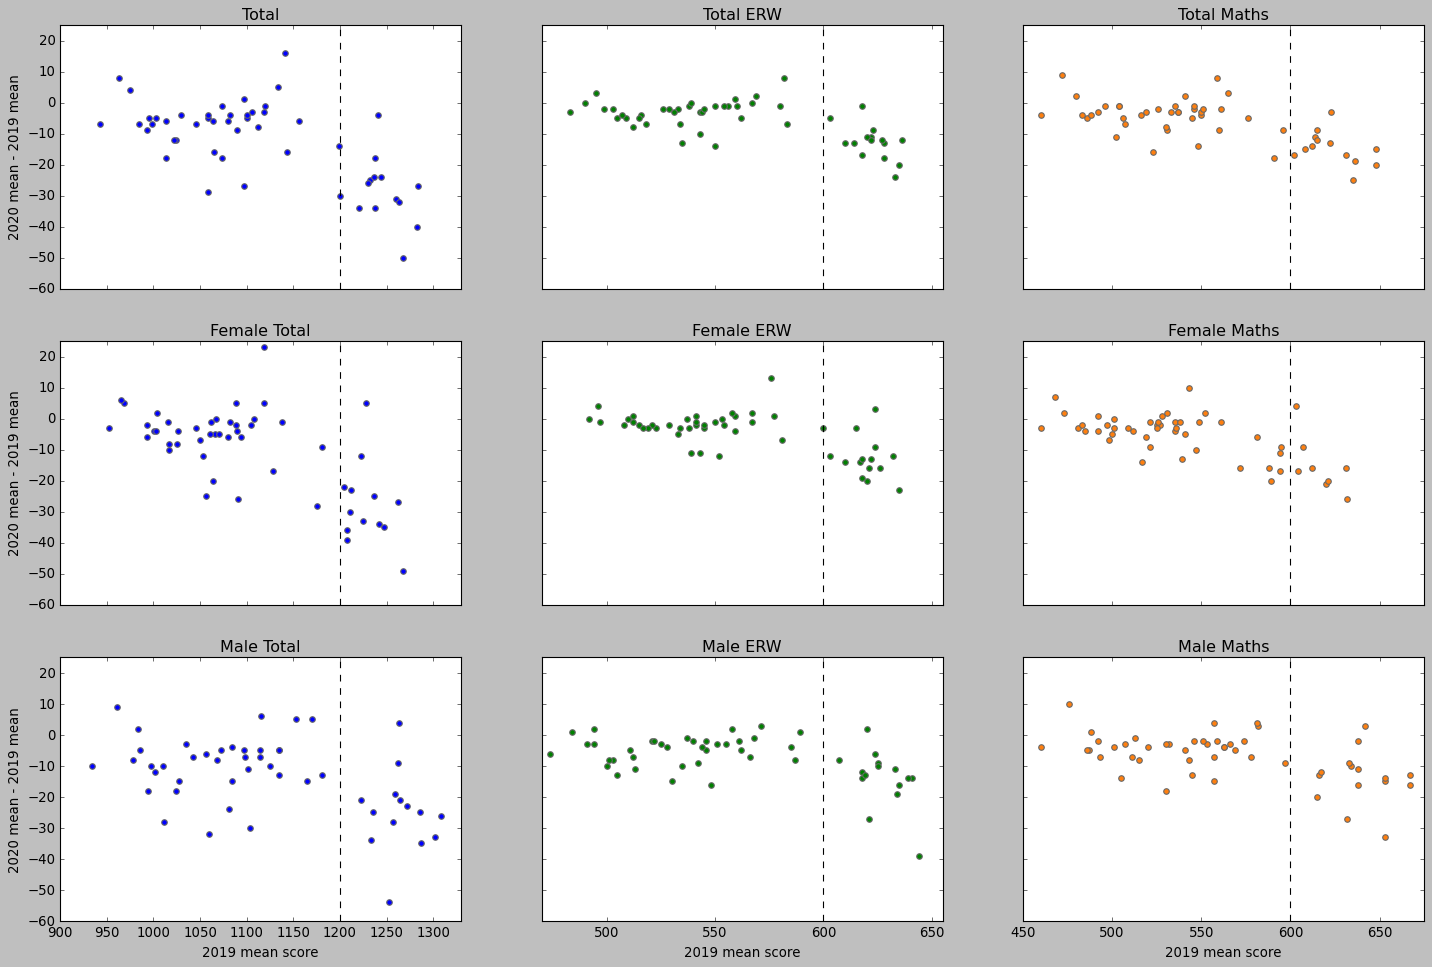

In [44]:
tot_fem2019 = mean_df[mean_df['year']==2019]['tot_fem'].values
tot_fem2020 = mean_df[mean_df['year']==2020]['tot_fem'].values
erw_fem2019 = mean_df[mean_df['year']==2019]['erw_fem'].values
erw_fem2020 = mean_df[mean_df['year']==2020]['erw_fem'].values
math_fem2019 = mean_df[mean_df['year']==2019]['math_fem'].values
math_fem2020 = mean_df[mean_df['year']==2020]['math_fem'].values

tot_male2019 = mean_df[mean_df['year']==2019]['tot_male'].values
tot_male2020 = mean_df[mean_df['year']==2020]['tot_male'].values
erw_male2019 = mean_df[mean_df['year']==2019]['erw_male'].values
erw_male2020 = mean_df[mean_df['year']==2020]['erw_male'].values
math_male2019 = mean_df[mean_df['year']==2019]['math_male'].values
math_male2020 = mean_df[mean_df['year']==2020]['math_male'].values

fig, axs = plt.subplots(3,3,figsize=(22,14))
axs[0,0].scatter(tot_mean2019, tot_mean2020 - tot_mean2019,s=25, edgecolor='dimgrey')
axs[0,0].set_title('Total')
axs[0,1].scatter(erw_mean2019, erw_mean2020 - erw_mean2019, s=25,color='green',edgecolor='dimgrey')
axs[0,1].set_title('Total ERW')
axs[0,2].scatter(math_mean2019, math_mean2020 - math_mean2019, s=25,color='tab:orange',edgecolor='dimgrey')
axs[0,2].set_title('Total Maths')

axs[1,0].scatter(tot_fem2019, tot_fem2020 - tot_fem2019,s=25,edgecolor='dimgrey')
axs[1,0].set_title('Female Total')
axs[1,1].scatter(erw_fem2019, erw_fem2020 - erw_fem2019, s=25,color='green',edgecolor='dimgrey')
axs[1,1].set_title('Female ERW')
axs[1,2].scatter(math_fem2019, math_fem2020 - math_fem2019, s=25,color='tab:orange',edgecolor='dimgrey')
axs[1,2].set_title('Female Maths')
axs[2,0].scatter(tot_male2019, tot_male2020 - tot_male2019,s=25,edgecolor='dimgrey')
axs[2,0].set_title('Male Total')
axs[2,1].scatter(erw_male2019, erw_male2020 - erw_male2019, s=25,color='green',edgecolor='dimgrey')
axs[2,1].set_title('Male ERW')
axs[2,2].scatter(math_male2019, math_male2020 - math_male2019, s=25,color='tab:orange',edgecolor='dimgrey')
axs[2,2].set_title('Male Maths')

for i in range(3):
    axs[i,0].axvline(x=1200, linestyle='--',linewidth=1,color='black')
#     axs[i,0].axvline(x=1000, linestyle='--',linewidth=1,color='black')
    axs[i,0].set_xlim([900,1330])

for i in range(3):
    for j in range(1,3):
        if j == 1:
            axs[i,j].set_xlim([470,655])
        if j == 2:
            axs[i,j].set_xlim([450,675])
#         axs[i,j].axvline(x=500, linestyle='--',linewidth=1,color='black')
        axs[i,j].axvline(x=600, linestyle='--',linewidth=1,color='black')

for ax in axs.flat:
    ax.set_ylim([-60,25])
    ax.set(xlabel='2019 mean score', ylabel='2020 mean - 2019 mean')
for ax in fig.get_axes():
    ax.label_outer()

Text(0.5, 0.98, '$\\Delta_{19/20}$ vs. Covid Intensity')

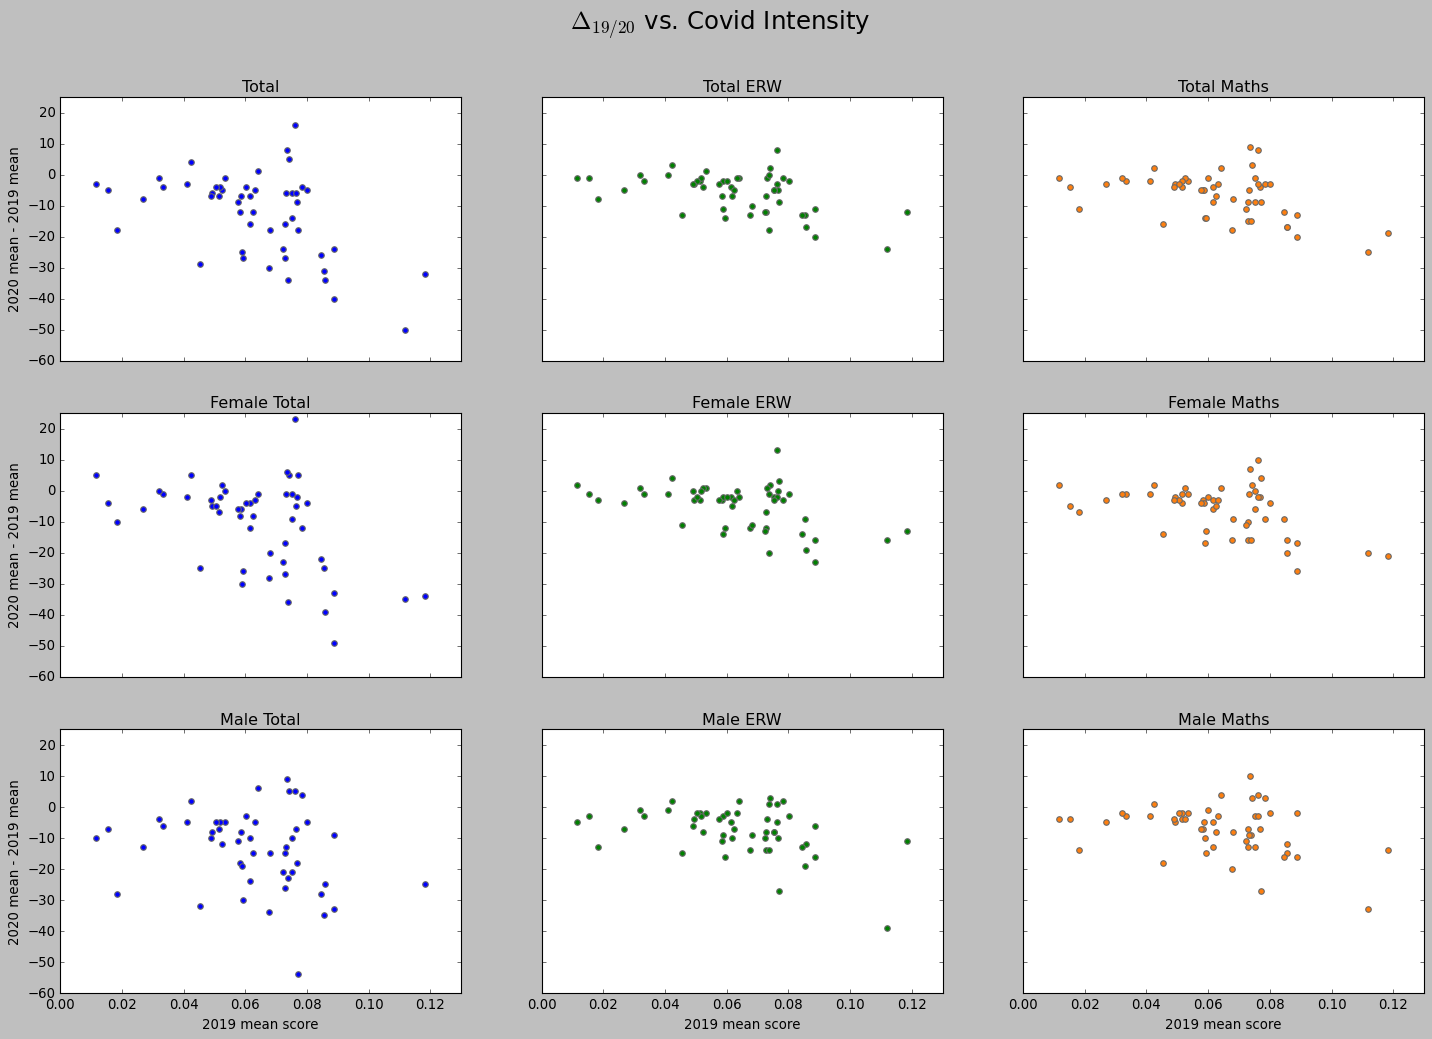

In [138]:
tot_fem2019 = mean_df[mean_df['year']==2019]['tot_fem'].values
tot_fem2020 = mean_df[mean_df['year']==2020]['tot_fem'].values
erw_fem2019 = mean_df[mean_df['year']==2019]['erw_fem'].values
erw_fem2020 = mean_df[mean_df['year']==2020]['erw_fem'].values
math_fem2019 = mean_df[mean_df['year']==2019]['math_fem'].values
math_fem2020 = mean_df[mean_df['year']==2020]['math_fem'].values

tot_male2019 = mean_df[mean_df['year']==2019]['tot_male'].values
tot_male2020 = mean_df[mean_df['year']==2020]['tot_male'].values
erw_male2019 = mean_df[mean_df['year']==2019]['erw_male'].values
erw_male2020 = mean_df[mean_df['year']==2020]['erw_male'].values
math_male2019 = mean_df[mean_df['year']==2019]['math_male'].values
math_male2020 = mean_df[mean_df['year']==2020]['math_male'].values

fig, axs = plt.subplots(3,3,figsize=(22,14))
axs[0,0].scatter(cov_deaths, tot_mean2020 - tot_mean2019,s=25, edgecolor='dimgrey')
axs[0,0].set_title('Total')
axs[0,1].scatter(cov_deaths, erw_mean2020 - erw_mean2019, s=25,color='green',edgecolor='dimgrey')
axs[0,1].set_title('Total ERW')
axs[0,2].scatter(cov_deaths, math_mean2020 - math_mean2019, s=25,color='tab:orange',edgecolor='dimgrey')
axs[0,2].set_title('Total Maths')

axs[1,0].scatter(cov_deaths, tot_fem2020 - tot_fem2019,s=25,edgecolor='dimgrey')
axs[1,0].set_title('Female Total')
axs[1,1].scatter(cov_deaths, erw_fem2020 - erw_fem2019, s=25,color='green',edgecolor='dimgrey')
axs[1,1].set_title('Female ERW')
axs[1,2].scatter(cov_deaths, math_fem2020 - math_fem2019, s=25,color='tab:orange',edgecolor='dimgrey')
axs[1,2].set_title('Female Maths')
axs[2,0].scatter(cov_deaths, tot_male2020 - tot_male2019,s=25,edgecolor='dimgrey')
axs[2,0].set_title('Male Total')
axs[2,1].scatter(cov_deaths, erw_male2020 - erw_male2019, s=25,color='green',edgecolor='dimgrey')
axs[2,1].set_title('Male ERW')
axs[2,2].scatter(cov_deaths, math_male2020 - math_male2019, s=25,color='tab:orange',edgecolor='dimgrey')
axs[2,2].set_title('Male Maths')

for i in range(3):
    axs[i,0].axvline(x=1200, linestyle='--',linewidth=1,color='black')
    axs[i,0].axvline(x=1000, linestyle='--',linewidth=1,color='black')
    axs[i,0].set_xlim([0,0.13])

for i in range(3):
    for j in range(1,3):
        if j == 1:
            axs[i,j].set_xlim([0,0.13])
        if j == 2:
            axs[i,j].set_xlim([0,0.13])
        axs[i,j].axvline(x=500, linestyle='--',linewidth=1,color='black')
        axs[i,j].axvline(x=600, linestyle='--',linewidth=1,color='black')

for ax in axs.flat:
    ax.set_ylim([-60,25])
    ax.set(xlabel='2019 mean score', ylabel='2020 mean - 2019 mean')
for ax in fig.get_axes():
    ax.label_outer()
plt.suptitle('$\Delta_{19/20}$ vs. Covid Intensity', fontsize=22)

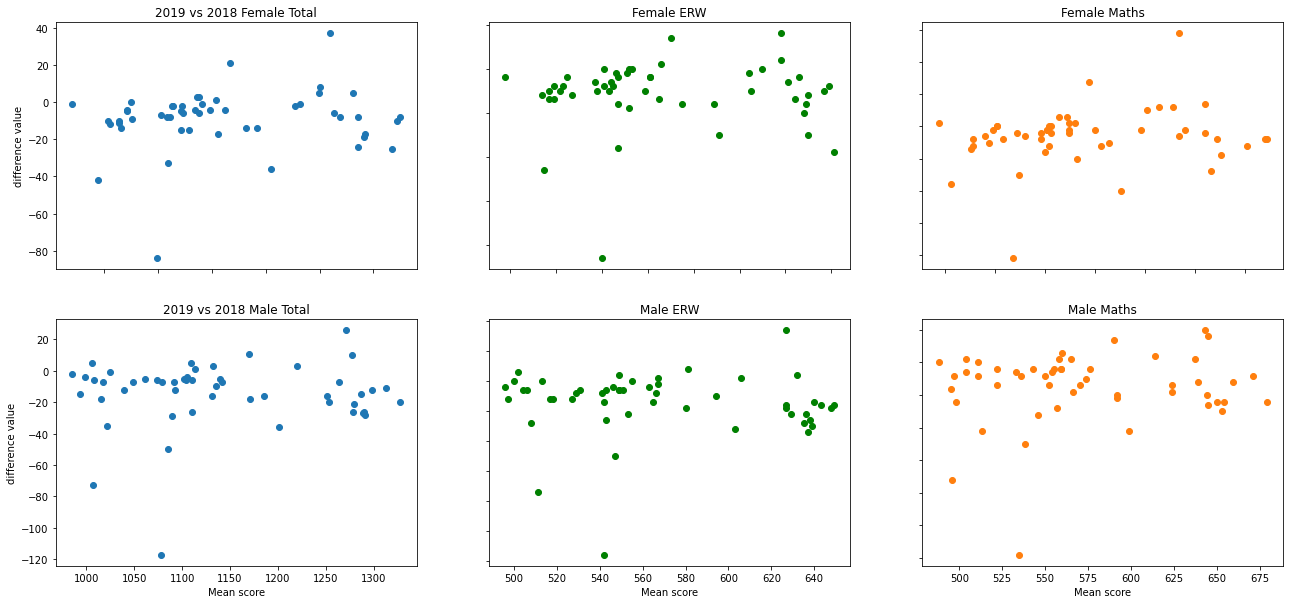

In [18]:
tot_fem2018 = mean_df[mean_df['year']==2018]['tot_fem'].values
tot_fem2019 = mean_df[mean_df['year']==2019]['tot_fem'].values
erw_fem2018 = mean_df[mean_df['year']==2018]['erw_fem'].values
erw_fem2019 = mean_df[mean_df['year']==2019]['erw_fem'].values
math_fem2018 = mean_df[mean_df['year']==2018]['math_fem'].values
math_fem2019 = mean_df[mean_df['year']==2019]['math_fem'].values

tot_male2018 = mean_df[mean_df['year']==2018]['tot_male'].values
tot_male2019 = mean_df[mean_df['year']==2019]['tot_male'].values
erw_male2018 = mean_df[mean_df['year']==2018]['erw_male'].values
erw_male2019 = mean_df[mean_df['year']==2019]['erw_male'].values
math_male2018 = mean_df[mean_df['year']==2018]['math_male'].values
math_male2019 = mean_df[mean_df['year']==2019]['math_male'].values

fig, axs = plt.subplots(2,3,figsize=(22,10))
axs[0,0].scatter(tot_fem2018, tot_fem2019 - tot_fem2018)
axs[0,0].set_title('2019 vs 2018 Female Total')
axs[0,1].scatter(erw_fem2018, erw_fem2019 - erw_fem2018, color='green')
axs[0,1].set_title('Female ERW')
axs[0,2].scatter(math_fem2018, math_fem2019 - math_fem2018, color='tab:orange')
axs[0,2].set_title('Female Maths')
axs[1,0].scatter(tot_male2018, tot_male2019 - tot_male2018)
axs[1,0].set_title('2019 vs 2018 Male Total')
axs[1,1].scatter(erw_male2018, erw_male2019 - erw_male2018, color='green')
axs[1,1].set_title('Male ERW')
axs[1,2].scatter(math_male2018, math_male2019 - math_male2018, color='tab:orange')
axs[1,2].set_title('Male Maths')

for ax in axs.flat:
    ax.set(xlabel='Mean score', ylabel='difference value')
for ax in fig.get_axes():
    ax.label_outer()

2017 has no data on gender score distribution.

Conduct Spearman rank correlation test:

First, we check to see if relationship exists for the period of interest, i.e. 2019-2020

In [19]:
print('P-value of total mean' ,stats.spearmanr(tot_mean2019, tot_mean2020 - tot_mean2019)[1])
print('P-value of ERW mean' ,stats.spearmanr(erw_mean2019, erw_mean2020 - erw_mean2019)[1])
print('P-value of maths mean' ,stats.spearmanr(math_mean2019, math_mean2020 - math_mean2019)[1])
print('\n')
#By gender
#girls
print('P-value of total female mean' ,stats.spearmanr(tot_fem2019, tot_fem2020 - tot_fem2019)[1])
print('P-value of ERW female mean' ,stats.spearmanr(erw_fem2019, erw_fem2020 - erw_fem2019)[1])
print('P-value of maths female mean' ,stats.spearmanr(math_fem2019, math_fem2020 - math_fem2019)[1])
print('\n')
print('P-value of total male mean' ,stats.spearmanr(tot_male2019, tot_male2020 - tot_male2019)[1])
print('P-value of ERW male mean' ,stats.spearmanr(erw_male2019, erw_male2020 - erw_male2019)[1])
print('P-value of maths male mean' ,stats.spearmanr(math_male2019, math_male2020 - math_male2019)[1])

P-value of total mean 0.0005193768343726071
P-value of ERW mean 0.0010577577499570278
P-value of maths mean 5.05428895658959e-05


P-value of total female mean 0.00012961845240064488
P-value of ERW female mean 0.00022007750944237538
P-value of maths female mean 0.00013127148004845183


P-value of total male mean 0.0023688712275050446
P-value of ERW male mean 0.00497668221158285
P-value of maths male mean 0.004104765990209073


We see that relationship exists everywhere!

Next, let's check for the other available time periods (2018-2019, 2017-2018, 2019-2021)

In [87]:
### 2018-2019
print('P-value of total mean' ,stats.spearmanr(tot_mean2018, tot_mean2019 - tot_mean2018)[1])
print('P-value of ERW mean' ,stats.spearmanr(erw_mean2018, erw_mean2019 - erw_mean2018)[1])
print('P-value of maths mean' ,stats.spearmanr(math_mean2018, math_mean2019 - math_mean2018)[1])
print('\n')
#By gender
#girls
print('P-value of total female mean' ,stats.spearmanr(tot_fem2018, tot_fem2019 - tot_fem2018)[1])
print('P-value of ERW female mean' ,stats.spearmanr(erw_fem2018, erw_fem2019 - erw_fem2018)[1])
print('P-value of maths female mean' ,stats.spearmanr(math_fem2018, math_fem2019 - math_fem2018)[1])
print('\n')
print('P-value of total male mean' ,stats.spearmanr(tot_male2018, tot_male2019 - tot_male2018)[1])
print('P-value of ERW male mean' ,stats.spearmanr(erw_male2018, erw_male2019 - erw_male2018)[1])
print('P-value of maths male mean' ,stats.spearmanr(math_male2018, math_male2019 - math_male2018)[1])

P-value of total mean 0.7473085674061005
P-value of ERW mean 0.16232522501178617
P-value of maths mean 0.8414388627529444


P-value of total female mean 0.6087850139150617
P-value of ERW female mean 0.985741205899457
P-value of maths female mean 0.36559271943901006


P-value of total male mean 0.24637208443313682
P-value of ERW male mean 0.074512264642644
P-value of maths male mean 0.7750242526836096


In [93]:
### 2017-2018
print('P-value of total mean' ,stats.spearmanr(tot_mean2017, tot_mean2018 - tot_mean2017)[1])
print('P-value of ERW mean' ,stats.spearmanr(erw_mean2017, erw_mean2018 - erw_mean2017)[1])
print('P-value of maths mean' ,stats.spearmanr(math_mean2017, math_mean2018 - math_mean2017)[1])

P-value of total mean 0.06068353608092123
P-value of ERW mean 0.004710664061533643
P-value of maths mean 0.23703977878798135


Generally, we see that despite some small relationships exhibited in 2017-2018, there are no observable trends in the changes of test scores during other years. 

In [91]:
###2019-2021
print('P-value of total mean' ,stats.spearmanr(tot_mean2019, tot_mean2021 - tot_mean2019)[1])
print('P-value of ERW mean' ,stats.spearmanr(erw_mean2019, erw_mean2021 - erw_mean2019)[1])
print('P-value of maths mean' ,stats.spearmanr(math_mean2019, math_mean2021 - math_mean2019)[1])
print('\n')
#By gender
#girls
print('P-value of total female mean' ,stats.spearmanr(tot_fem2019, tot_fem2021 - tot_fem2019)[1])
print('P-value of ERW female mean' ,stats.spearmanr(erw_fem2019, erw_fem2021 - erw_fem2019)[1])
print('P-value of maths female mean' ,stats.spearmanr(math_fem2019, math_fem2021 - math_fem2019)[1])
print('\n')
print('P-value of total male mean' ,stats.spearmanr(tot_male2019, tot_male2021 - tot_male2019)[1])
print('P-value of ERW male mean' ,stats.spearmanr(erw_male2019, erw_male2021 - erw_male2019)[1])
print('P-value of maths male mean' ,stats.spearmanr(math_male2019, math_male2021 - math_male2019)[1])

P-value of total mean 0.014490726976323498
P-value of ERW mean 0.020457082690890464
P-value of maths mean 0.007540975451265448


P-value of total female mean 0.03141549989664426
P-value of ERW female mean 0.08506632792504566
P-value of maths female mean 0.008787973001647489


P-value of total male mean 0.00628424269572535
P-value of ERW male mean 0.002729048417407988
P-value of maths male mean 0.010301848483097849


### Mann-Whitney Test

Next, we conduct Mann-Whitney test.

In [24]:
def MW_test(bline, x, y):
    A = []
    B = []
    for i in range(len(x)):
        if x[i] <= bline:
            A.append(y[i])
        else:
            B.append(y[i])
    U1, p = stats.mannwhitneyu(A, B)
    return U1, p

In [25]:
### 2019-2020
print('P-value of total mean' , MW_test(1200, tot_mean2019, tot_mean2020 - tot_mean2019)[1])
print('P-value of ERW mean' , MW_test(600, erw_mean2019, erw_mean2020 - erw_mean2019)[1])
print('P-value of maths mean' , MW_test(600, math_mean2019, math_mean2020 - math_mean2019)[1])
print('\n')
#By gender
#girls
print('P-value of total female mean' , MW_test(1200, tot_fem2019, tot_fem2020 - tot_fem2019)[1])
print('P-value of ERW female mean' , MW_test(600, erw_fem2019, erw_fem2020 - erw_fem2019)[1])
print('P-value of maths female mean' , MW_test(600, math_fem2019, math_fem2020 - math_fem2019)[1])
print('\n')
print('P-value of total male mean' , MW_test(1200, tot_male2019, tot_male2020 - tot_male2019)[1])
print('P-value of ERW male mean' , MW_test(600, erw_male2019, erw_male2020 - erw_male2019)[1])
print('P-value of maths male mean' , MW_test(600,math_male2019, math_male2020 - math_male2019)[1])

P-value of total mean 1.3587457128006913e-05
P-value of ERW mean 6.772622525453078e-06
P-value of maths mean 1.1926433496694188e-05


P-value of total female mean 2.022448065441595e-05
P-value of ERW female mean 8.526428634110186e-06
P-value of maths female mean 0.003206014718123815


P-value of total male mean 6.463665742272539e-05
P-value of ERW male mean 0.00010319944099417457
P-value of maths male mean 0.0001914812647602016


Null  hypothesis of same distribution of A(0-1200) group and B(1200+) group is rejected.

In [ ]:
### 2018-2019
print('P-value of total mean' , MW_test(1200, tot_mean2018, tot_mean2019 - tot_mean2018)[1])
print('P-value of ERW mean' , MW_test(600, erw_mean2018, erw_mean2019 - erw_mean2018)[1])
print('P-value of maths mean' , MW_test(600, math_mean2018, math_mean2019 - math_mean2018)[1])
print('\n')
#By gender
#girls
print('P-value of total female mean' , MW_test(1200, tot_fem2018, tot_fem2019 - tot_fem2018)[1])
print('P-value of ERW female mean' , MW_te

In [26]:
st(600, erw_fem2018, erw_fem2019 - erw_fem2018)[1])
print('P-value of maths female mean' , MW_test(600, math_fem2018, math_fem2019 - math_fem2018)[1])
print('\n')
print('P-value of total male mean' , MW_test(1200, tot_male2018, tot_male2019 - tot_male2018)[1])
print('P-value of ERW male mean' , MW_test(600, erw_male2018, erw_male2019 - erw_male2018)[1])
print('P-value of maths male mean' , MW_test(600,math_male2018, math_male2019 - math_male2018)[1])

P-value of total mean 0.4791880823597723
P-value of ERW mean 0.18745685456599726
P-value of maths mean 0.8116069718750637


P-value of total female mean 0.2967370785425635
P-value of ERW female mean 0.9834491831297619
P-value of maths female mean 0.17251378580832255


P-value of total male mean 0.12231239138897361
P-value of ERW male mean 0.024567620691624454
P-value of maths male mean 0.7717918732177296


In [27]:
### 2017-2018
print('P-value of total mean' , MW_test(1200, tot_mean2017, tot_mean2018 - tot_mean2017)[1])
print('P-value of ERW mean' , MW_test(600, erw_mean2017, erw_mean2018 - erw_mean2017)[1])
print('P-value of maths mean' , MW_test(600, math_mean2017, math_mean2018 - math_mean2017)[1])
print('\n')

P-value of total mean 0.07350106709912255
P-value of ERW mean 0.008741261483548028
P-value of maths mean 0.665117669228045


